## Lending Club Case Study - Exploratory Data Analysis

<b>Assignment Brief:</b>

You work for a consumer finance company Lending Club which specialises in lending various types of loans to urban customers. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. When the company receives a loan application, <b>the company has to make a decision for loan approval based on the applicant’s profile.</b> When a person applies for a loan, there are two types of decisions that could be taken by the company:

<b>1. Loan accepted:</b> If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan. 

<b>2. Loan rejected:</b> The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

<b>Business Objectives:</b>
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.

Objective is to identify the risky loan applicants at the time of loan application so that such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment. And thus minimise the risk of losing money while lending to customers.

<b>Exploratory Data Analysis</b>

Data

We have been provided with the Private Data of Lending Club. 
The complete loan data for all loans issued through the time period 2007 to 2011.

We also have a data dictionary which describes the meaning of these variables.

Assumption:

The loan request if graded by LC and then listed for loan. Now it is up to the investor who decides which loan listing to invest in looking at the loan detail and borrowers information. 
Only those variables be chosen for analysis that will be available to the investor at the time of deciding whether to invest in a loan request or not.

### Understanding The Data Set

In [2]:
import os

In [3]:
path = "C:/Users/Rishabh/Desktop/UPGRAD/Statistics Essentials/Lending Club Case Study"

In [4]:
os.listdir(path)

['.ipynb_checkpoints',
 'analysis_loan.csv',
 'cleaned_loan.csv',
 'Data_Dictionary.xlsx',
 'loan.csv',
 'master_loan.csv',
 'Rishabh_Lending Club.ipynb']

In [5]:
# We have 2 files here -- loan.csv and Data_Dictionary.xlsx. Our main data file is load.csv

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Due to column size , set low_memory=False

loan = pd.read_csv("loan.csv",low_memory=False,encoding='ISO-8859-1')

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [9]:
# Looks like verbose is set to False, but this info is crisp too!

In [10]:
loan.shape

(39717, 111)

In [11]:
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [12]:
loan.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [15]:
# Checking for info of all columns
loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   member_id                       int64  
 2   loan_amnt                       int64  
 3   funded_amnt                     int64  
 4   funded_amnt_inv                 float64
 5   term                            object 
 6   int_rate                        object 
 7   installment                     float64
 8   grade                           object 
 9   sub_grade                       object 
 10  emp_title                       object 
 11  emp_length                      object 
 12  home_ownership                  object 
 13  annual_inc                      float64
 14  verification_status             object 
 15  issue_d                         object 
 16  loan_status                     object 
 17  pymnt_plan                    

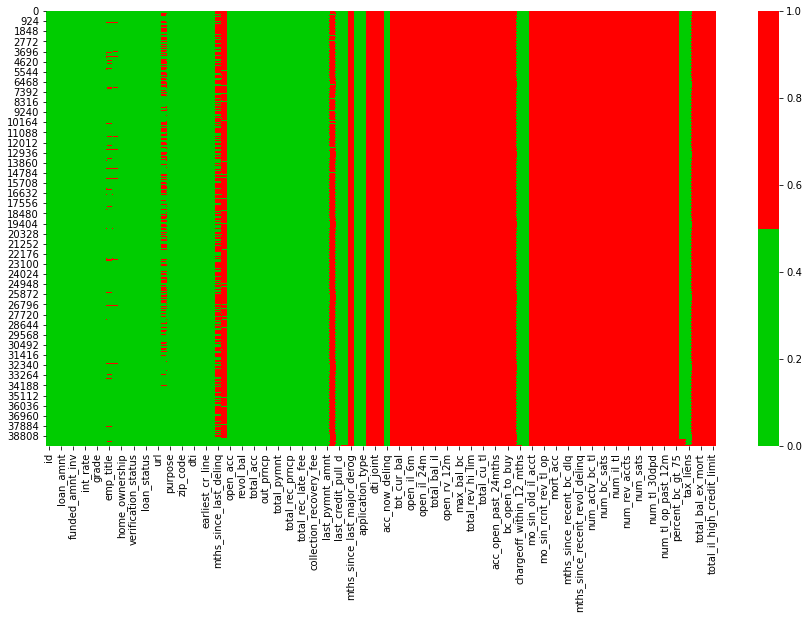

In [18]:
# Check if data is cleaned
plt.figure(figsize=[15,8])
colours = ['#00cc00', '#ff0000'] # specify the colours - red is missing. Green is not missing.
sns.heatmap(loan[loan.columns].isnull(),cmap=sns.color_palette(colours))
plt.show()

In [19]:
# We can very well see that the data is not cleaned. So, first we have to clean the data

### Data Cleaning

In [20]:
loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   member_id                       int64  
 2   loan_amnt                       int64  
 3   funded_amnt                     int64  
 4   funded_amnt_inv                 float64
 5   term                            object 
 6   int_rate                        object 
 7   installment                     float64
 8   grade                           object 
 9   sub_grade                       object 
 10  emp_title                       object 
 11  emp_length                      object 
 12  home_ownership                  object 
 13  annual_inc                      float64
 14  verification_status             object 
 15  issue_d                         object 
 16  loan_status                     object 
 17  pymnt_plan                    

### null_counts : bool, optional",
Whether to show the non-null counts. By default, this is shown only if the DataFrame is smaller than 
pandas.options.display.max_info_rows and pandas.options.display.max_info_columns. 
A value of True always shows the counts, and False never shows the counts.

In [21]:
loan.info(null_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                 

In [22]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [23]:
# Null counts as a percentage
print(round(100*(loan.isnull().sum()/len(loan.index)), 2))

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [22]:
# Lets try to see missing data in a histogram to be more clear
#for col in loan.columns:
 #   missing = loan[col].isnull()
  #  num_missing = np.sum(missing)
    
   # if num_missing > 0:  
    #    print('created missing indicator for: {}'.format(col))
     #   loan['{}_ismissing'.format(col)] = missing

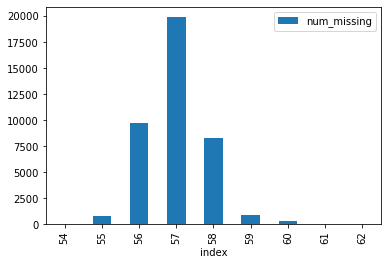

In [24]:
# then based on the indicator, plot the histogram of missing values
# ismissing_cols = [col for col in loan.columns if 'ismissing' in col]
# loan['num_missing'] = loan[ismissing_cols].sum(axis=1)
# loan['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')
# plt.show()

In [51]:
# As a conclusion from the histogram seen above, we can make a threshold percentage of removing columns for missing values.
# We take it as 50%. So, removing all columns which have more than 50% missing values

In [24]:
missing = round(100*(loan.isnull().sum()/len(loan.index)), 2)

In [25]:
columns_missing = list(missing[missing >= 50].index)

In [26]:
len(columns_missing)

57

In [27]:
loan = loan.drop(columns_missing,axis=1)

In [28]:
loan.shape

(39717, 54)

In [29]:
missing = round(100*(loan.isnull().sum()/len(loan.index)), 2)
missing[missing!=0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [30]:
loan = loan.drop('desc',axis=1)

In [31]:
missing = round(100*(loan.isnull().sum()/len(loan.index)), 2)
missing[missing!=0]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [32]:
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan  \
0          n   
1          n   
2          n   
3          n   
4          n   

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175   
3  https://lendingclub.com/browse/loanDetail.action?loan_id=1076863   
4  https://lendingclub.com/browse/loanDetail.action?loan_id=1075358   

          purpose                 title zip_code addr_state    dti  \
0     credit_card              Computer    860xx         AZ  27.65   
1             car                  bike    309xx         GA   1.00   
2  small_business  real estate business    606xx         IL   8.72   
3           other              personel    917xx         CA  20.00   
4           other              Personal    972xx         OR  17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0            0           Jan-85               1         3        0      13648   
1            0           Apr-99               5         3        0       1687   
2            0           Nov-01               2         2        0       2956   
3            0           Feb-96               1        10        0       5598   
4            0           Jan-96               0        15        0      27783   

  revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0     83.70%          9                   f       0.00           0.00   
1      9.40%          4                   f       0.00           0.00   
2     98.50%         10                   f       0.00           0.00   
3        21%         37                   f       0.00           0.00   
4     53.90%         38                   f     524.06         524.06   

    total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0   5863.155187          5833.84          5000.00         863.16   
1   1008.710000          1008.71           456.46         435.17   
2   3005.666844          3005.67          2400.00         605.67   
3  12231.890000         12231.89         10000.00        2214.92   
4   3513.330000          3513.33          2475.94        1037.39   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00        0.00                     0.00       Jan-15   
1                0.00      117.08                     1.11       Apr-13   
2                0.00        0.00                     0.00       Jun-14   
3               16.97        0.00      

In [33]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [34]:
# Check uniqueness of columns
print("unique emp_title : %d"  % len(loan.emp_title.unique()))
print("unique emp_length : %d"  % len(loan.emp_length.unique()))
print("unique title : %d"  % len(loan.title.unique()))
print("unique revol_util : %d"  % len(loan.revol_util.unique()))
print("unique last_pymnt_d : %d"  % len(loan.last_pymnt_d.unique()))
print("unique last_credit_pull_d : %d"  % len(loan.last_credit_pull_d.unique()))
print("unique collections_12_mths_ex_med : %d"  % len(loan.collections_12_mths_ex_med.unique()))
print("unique chargeoff_within_12_mths : %d"  % len(loan.chargeoff_within_12_mths.unique()))
print("unique pub_rec_bankruptcies : %d"  % len(loan.pub_rec_bankruptcies.unique()))
print("unique tax_liens : %d"  % len(loan.tax_liens.unique()))

unique emp_title : 28821
unique emp_length : 12
unique title : 19616
unique revol_util : 1090
unique last_pymnt_d : 102
unique last_credit_pull_d : 107
unique collections_12_mths_ex_med : 2
unique chargeoff_within_12_mths : 2
unique pub_rec_bankruptcies : 4
unique tax_liens : 2


In [35]:
# => Categorical Variables are : emp_length, collections_12_mths_ex_med, chargeoff_within_12_mths, pub_rec_bankruptcies
# and tax_liens. Let us look at the different values for these categorical columns.

In [36]:
loan.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [37]:
loan.collections_12_mths_ex_med.value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [38]:
loan.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [39]:
loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [40]:
loan.tax_liens.value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [41]:
# Columns - collections_12_mths_ex_med,chargeoff_within_12_mths and tax_liens have only one value in all
# so it will not at all impact our analysis. Better to remove them.

In [42]:
drop_columns = ['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens']

In [43]:
loan = loan.drop(drop_columns,axis=1)

In [44]:
loan.shape

(39717, 50)

In [45]:
loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [46]:
loan.pub_rec_bankruptcies.isnull().sum()

697

In [47]:
# => This column might be needed, as taking a decision to give/reject a loan can depend on the number of bankrupcies too.
# So, we will keep this column.

In [48]:
loan.pub_rec_bankruptcies.describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [49]:
loan.pub_rec_bankruptcies.median()

0.0

In [50]:
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan  \
0          n   
1          n   
2          n   
3          n   
4          n   

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175   
3  https://lendingclub.com/browse/loanDetail.action?loan_id=1076863   
4  https://lendingclub.com/browse/loanDetail.action?loan_id=1075358   

          purpose                 title zip_code addr_state    dti  \
0     credit_card              Computer    860xx         AZ  27.65   
1             car                  bike    309xx         GA   1.00   
2  small_business  real estate business    606xx         IL   8.72   
3           other              personel    917xx         CA  20.00   
4           other              Personal    972xx         OR  17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0            0           Jan-85               1         3        0      13648   
1            0           Apr-99               5         3        0       1687   
2            0           Nov-01               2         2        0       2956   
3            0           Feb-96               1        10        0       5598   
4            0           Jan-96               0        15        0      27783   

  revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0     83.70%          9                   f       0.00           0.00   
1      9.40%          4                   f       0.00           0.00   
2     98.50%         10                   f       0.00           0.00   
3        21%         37                   f       0.00           0.00   
4     53.90%         38                   f     524.06         524.06   

    total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0   5863.155187          5833.84          5000.00         863.16   
1   1008.710000          1008.71           456.46         435.17   
2   3005.666844          3005.67          2400.00         605.67   
3  12231.890000         12231.89         10000.00        2214.92   
4   3513.330000          3513.33          2475.94        1037.39   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00        0.00                     0.00       Jan-15   
1                0.00      117.08                     1.11       Apr-13   
2                0.00        0.00                     0.00       Jun-14   
3               16.97        0.00      

In [51]:
loan.loc[loan['pub_rec_bankruptcies'].isnull()]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
35006   69001     265533      15000        15000     14875.000000   36 months   
35058   59006     154254       3000         3000      2988.236621   36 months   
35362   65426     232106       4000         4000      3892.258856   36 months   
38443   68926     264924       2300         2300       589.605658   36 months   
38717   69251     267771       6000         6000       500.000000   36 months   
38728   65640     234569       5000         2650       495.490000   36 months   
38876   69924     274280      10000        10000      8790.326481   36 months   
38971   69828     272798      15000        15000     13138.201850   36 months   
39004  282707     282641      10000        10000      8741.042410   36 months   
39005  282569     274158      12000        12000      6475.000000   36 months   
39006  282347     282322       5000         5000      3875.000000   36 months   
39007  282275     281958       6000         6000      4612.877971   36 months   
39008  282202     280579       9000         9000      3825.000000   36 months   
39009  282074     281432       4000         4000      2825.000000   36 months   
39010  282054     282035       1200         1200       875.000000   36 months   
39011  281841     281765       3500         3500      2817.200000   36 months   
39012  281836     281817       3000         3000      2375.000000   36 months   
39014  281651     279321      12000        12000      6721.352900   36 months   
39015  281565     281517       7000         7000      3250.000000   36 months   
39016  281384     281309       3500         3500      2937.550000   36 months   
39017  281381     279873       9000         9000      4950.000000   36 months   
39018  280871     280818       5400         5400      4419.377953   36 months   
39019  280776     280764      19200        19200      5100.006009   36 months   
39020  280623     280612      15000        15000      2675.000000   36 months   
39021  280356     278182       5000         5000      4158.120000   36 months   
39022  280337     280315      12000        12000      5977.800000   36 months   
39023  280193     280170      10000        10000      8100.260000   36 months   
39024  280176     280158      10000        10000      8089.070000   36 months   
39026  279901     279891      25000        25000      5050.000000   36 months   
39027  279455     279443       8400         8400      6882.960000   36 months   
39028  279283     271337      12000        12000      9496.445566   36 months   
39029  279242     279065      10000        10000      7100.000000   36 months   
39030  279032     279020      12000        12000      9600.000000   36 months   
39031  278911     278880      10000        10000     10000.000000   36 months   
39032  278622     269243      14000        14000      6718.580000   36 months   
39033  278405     278389      12000        12000      1102.106249   36 months   
39034  278075     277896      12000        12000      6278.010000   36 months   
39035  278066     278052        950          950       950.000000   36 months   
39036  278018     277969      11225        11225      4049.996467   36 months   
39037  277895     277834       8000         8000      4420.725820   36 months   
39038  277875     276289      20000        20000      4260.121545   36 months   
39039  277709     275527      25000        25000      7625.000000   36 months   
39040  277688     277676       7200         7200      5500.001173   36 months   
39041  277628     277602      14300        14300      5217.170000   36 months   
39042  277583     277564       9000         9000      6022.310920   36 months   
39043  277468     277430       8000         8000      6300.000000   36 months   
39044  277162     276284       6300         6300      5200.000000   36 months   
39045  276979     276369      11000        11000      4719.340000   36 months   
39046  276857     276352      18000       

In [52]:
# There are 697 Null Values, which can be dropped.
loan=loan[~loan.pub_rec_bankruptcies.isnull()]

In [53]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

emp_title       6.19
emp_length      2.75
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

In [51]:
#### We have to look at metadata to look deeper.

# emp_title : The job title supplied by the Borrower when applying for the loan. -- IMP

# emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year 
## and 10 means ten or more years. -- IMP

# title : The loan title provided by the borrower -- IMP

# revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all 
## available revolving credit. -- IMP

# last_pymnt_d : Last month payment was received -- IMP

In [52]:
# => So these all are important. We can drop the null values for each of these columns

In [54]:
loan=loan[~loan.emp_title.isnull()]

In [55]:
loan=loan[~loan.emp_length.isnull()]

In [56]:
loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]

In [57]:
missing = round(100*(loan.isnull().sum()/len(loan.index)), 2)
missing[missing!=0]

Series([], dtype: float64)

In [58]:
loan.shape

(36433, 50)

In [59]:
# => We have reduced the data to 36433 rows and 50 columns.
# Let us write the data to a separate file to use further for analysis

In [60]:
loan.to_csv('cleaned_loan.csv', encoding='utf-8', index=False)

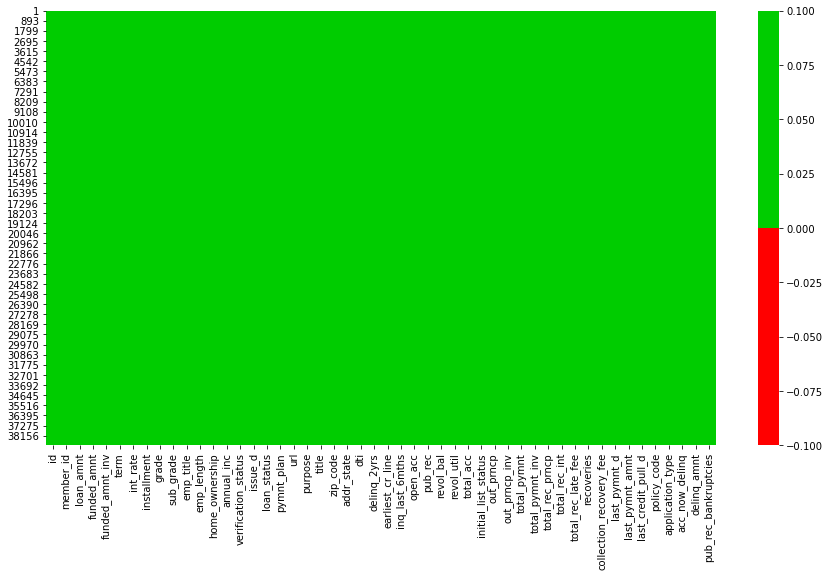

In [63]:
# Check if data is cleaned
plt.figure(figsize=[15,8])
colours = ['#ff0000','#00cc00'] # specify the colours - red is missing. Green is not missing.
sns.heatmap(loan[loan.columns].isnull(),cmap=sns.color_palette(colours))
plt.show()

In [64]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       36433 non-null  int64  
 1   member_id                36433 non-null  int64  
 2   loan_amnt                36433 non-null  int64  
 3   funded_amnt              36433 non-null  int64  
 4   funded_amnt_inv          36433 non-null  float64
 5   term                     36433 non-null  object 
 6   int_rate                 36433 non-null  object 
 7   installment              36433 non-null  float64
 8   grade                    36433 non-null  object 
 9   sub_grade                36433 non-null  object 
 10  emp_title                36433 non-null  object 
 11  emp_length               36433 non-null  object 
 12  home_ownership           36433 non-null  object 
 13  annual_inc               36433 non-null  float64
 14  verification_status   

### We did data cleaning but still there are still 50 columns. Lets reduce it further.

In [65]:
clean_loan = pd.read_csv("cleaned_loan.csv")

In [66]:
clean_loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077430    1314167       2500         2500           2500.0   60 months   
1  1076863    1277178      10000        10000          10000.0   36 months   
2  1075358    1311748       3000         3000           3000.0   60 months   
3  1075269    1311441       5000         5000           5000.0   36 months   
4  1069639    1304742       7000         7000           7000.0   60 months   

  int_rate  installment grade sub_grade                  emp_title emp_length  \
0   15.27%        59.83     C        C4                      Ryder   < 1 year   
1   13.49%       339.31     C        C1        AIR RESOURCES BOARD  10+ years   
2   12.69%        67.79     B        B5   University Medical Group     1 year   
3    7.90%       156.46     A        A4       Veolia Transportaton    3 years   
4   15.96%       170.08     C        C5  Southern Star Photography    8 years   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     30000.0     Source Verified  Dec-11  Charged Off   
1           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
2           RENT     80000.0     Source Verified  Dec-11      Current   
3           RENT     36000.0     Source Verified  Dec-11   Fully Paid   
4           RENT     47004.0        Not Verified  Dec-11   Fully Paid   

  pymnt_plan  \
0          n   
1          n   
2          n   
3          n   
4          n   

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1076863   
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1075358   
3  https://lendingclub.com/browse/loanDetail.action?loan_id=1075269   
4  https://lendingclub.com/browse/loanDetail.action?loan_id=1069639   

              purpose                                  title zip_code  \
0                 car                                   bike    309xx   
1               other                               personel    917xx   
2               other                               Personal    972xx   
3             wedding  My wedding loan I promise to pay back    852xx   
4  debt_consolidation                                   Loan    280xx   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         GA   1.00            0           Apr-99               5         3   
1         CA  20.00            0           Feb-96               1        10   
2         OR  17.94            0           Jan-96               0        15   
3         AZ  11.20            0           Nov-04               3         9   
4         NC  23.51            0           Jul-05               1         7   

   pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0        0       1687      9.40%          4                   f       0.00   
1        0       5598        21%         37                   f       0.00   
2        0      27783     53.90%         38                   f     524.06   
3        0       7963     28.30%         12                   f       0.00   
4        0      17726     85.60%         11                   f       0.00   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0           0.00      1008.71          1008.71           456.46   
1           0.00     12231.89         12231.89         10000.00   
2         524.06      3513.33          3513.33          2475.94   
3           0.00      5632.21          5632.21          5000.00   
4           0.00     10110.84         10110.84          6985.61   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         435.17                0.00      117.08                     1.11   
1        2214.92               16.97        0.00                     0.00   
2        1037.39                0.00        0.00                     0.0

In [67]:
clean_loan.shape

(36433, 50)

In [68]:
clean_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       36433 non-null  int64  
 1   member_id                36433 non-null  int64  
 2   loan_amnt                36433 non-null  int64  
 3   funded_amnt              36433 non-null  int64  
 4   funded_amnt_inv          36433 non-null  float64
 5   term                     36433 non-null  object 
 6   int_rate                 36433 non-null  object 
 7   installment              36433 non-null  float64
 8   grade                    36433 non-null  object 
 9   sub_grade                36433 non-null  object 
 10  emp_title                36433 non-null  object 
 11  emp_length               36433 non-null  object 
 12  home_ownership           36433 non-null  object 
 13  annual_inc               36433 non-null  float64
 14  verification_status   

In [69]:
clean_loan.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

In [70]:
# We can remove columns with one unique values since it won't contribute to our analysis

# There are the first 6 ones :

#acc_now_delinq                 1
#application_type               1
#policy_code                    1
#initial_list_status            1
#delinq_amnt                    1
#pymnt_plan                     1

In [71]:
clean_loan.shape

(36433, 50)

In [72]:
columns_drop = ['acc_now_delinq','application_type','policy_code','initial_list_status','delinq_amnt','pymnt_plan']
clean_loan = clean_loan.drop(columns_drop,axis=1)

In [73]:
clean_loan.shape

(36433, 44)

In [74]:
# Now we have to look at the metadata to reduce the columns further. "Loan_Status" is our Target Variable

In [75]:
clean_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       36433 non-null  int64  
 1   member_id                36433 non-null  int64  
 2   loan_amnt                36433 non-null  int64  
 3   funded_amnt              36433 non-null  int64  
 4   funded_amnt_inv          36433 non-null  float64
 5   term                     36433 non-null  object 
 6   int_rate                 36433 non-null  object 
 7   installment              36433 non-null  float64
 8   grade                    36433 non-null  object 
 9   sub_grade                36433 non-null  object 
 10  emp_title                36433 non-null  object 
 11  emp_length               36433 non-null  object 
 12  home_ownership           36433 non-null  object 
 13  annual_inc               36433 non-null  float64
 14  verification_status   

In [76]:
clean_loan.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_inv               1065
revol_util                  1082
total_rec_late_fee          1194
collection_recovery_fee     2386
dti                         2857
recoveries                  3585
annual_inc

## Reduce Columns

In [77]:
# To reduce it further I made some features of the columns we should remove :

# 1 = leaks information from the future (after the loan has already been funded),
# 2 = doesn’t affect the borrower’s ability to pay back the loan (e.g. a randomly generated ID value by Lending Club),
# 3 = is formatted poorly,
# 4 = requires more data or a lot of pre-processing to turn into useful a feature
# 5 = contains redundant information.
# 6 = others - which does not relate to "Loan_Status" 

In [78]:
# Lets check one by one.

# id : A unique LC assigned ID for the loan listing. Can be removed due to 2.
# member_id : A unique LC assigned Id for the borrower member. Remove approved due to 2.
# funded_amnt : The total amount committed to that loan at that point in time. Rejected due to 1.
# funded_amnt_inv : The total amount committed by investors for that loan at that point in time. Rejected due to 1.
# sub_grade : LC assigned loan subgrade. Rejected due to 5. "Grade" column already present.
# int_rate : Interest Rate on the loan. Rejected due to 5. Can be checked from the "Grade" column.
# emp_title : Contains 28207 unique values out of 36433, so rejected due to 4. Also, it will be too wide data for our analysis.
# issue_d : Contains 52 unique values. Rejected due to 1. Also, month will not make sense in our analysis.
# url : Rejected due to 2. Also, 36433 out of 36433 values are unique.
# zip_code : Rejected due to 3 and 5. We have "addr_state" column for that.
# out_prncp : Remaining outstanding principal for total amount funded. Rejected due to 1.
# out_prncp_inv : Remaining outstanding principal for portion of total amount funded by investors. Rejected due to 1.
# total_pymnt : Payments received to date for total amount funded. Rejected due to 1.
# total_pymnt_inv : Payments received to date for portion of total amount funded by investors. Rejected due to 1.
# total_rec_int : Interest received to date. Rejected due to 1.
# total_rec_late_fee : Late fees received to date. Rejected due to 1.
# total_rec_prncp : Principal received to date. Rejected due to 1.
# recoveries : post charge off gross recovery. Rejected due to 1.
# collection_recovery_fee : post charge off collection fee. Rejected due to 1.
# last_pymnt_amnt : Last total payment amount received. Rejected due to 1.
# last_pymnt_d : Last month payment was received. Rejected due to 1.

In [79]:
clean_loan.emp_title.nunique()

28207

In [80]:
clean_loan.url.value_counts()

https://lendingclub.com/browse/loanDetail.action?loan_id=749823     1
https://lendingclub.com/browse/loanDetail.action?loan_id=441178     1
https://lendingclub.com/browse/loanDetail.action?loan_id=351634     1
https://lendingclub.com/browse/loanDetail.action?loan_id=699011     1
https://lendingclub.com/browse/loanDetail.action?loan_id=975133     1
https://lendingclub.com/browse/loanDetail.action?loan_id=500212     1
https://lendingclub.com/browse/loanDetail.action?loan_id=511909     1
https://lendingclub.com/browse/loanDetail.action?loan_id=849137     1
https://lendingclub.com/browse/loanDetail.action?loan_id=1057239    1
https://lendingclub.com/browse/loanDetail.action?loan_id=887956     1
https://lendingclub.com/browse/loanDetail.action?loan_id=1014934    1
https://lendingclub.com/browse/loanDetail.action?loan_id=699567     1
https://lendingclub.com/browse/loanDetail.action?loan_id=847272     1
https://lendingclub.com/browse/loanDetail.action?loan_id=1025211    1
https://lendingclub.

In [81]:
clean_loan.pub_rec_bankruptcies.value_counts()

0.0    34931
1.0     1495
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [82]:
columns_drop_21 = ['id','member_id','funded_amnt','funded_amnt_inv','sub_grade','int_rate','emp_title','issue_d','url',
                   'zip_code','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee',
                   'total_rec_prncp','recoveries','collection_recovery_fee','last_pymnt_amnt','last_pymnt_d']
clean_loan = clean_loan.drop(columns_drop_21,axis=1)

In [83]:
clean_loan.shape

(36433, 23)

In [84]:
# Yeah!! So, we arrived at a conclusion that 23 columns are good for the analysis.

In [85]:
# Let us save it to another file which will be needed for final analysis.
clean_loan.to_csv('analysis_loan.csv', encoding='utf-8', index=False)

# Making Data Ready For Analysis

In [116]:
analysis_loan = pd.read_csv("analysis_loan.csv")

In [117]:
analysis_loan.head()

loan_amnt        term  installment grade emp_length home_ownership  \
0       2500   60 months        59.83     C   < 1 year           RENT   
1      10000   36 months       339.31     C  10+ years           RENT   
2       3000   60 months        67.79     B     1 year           RENT   
3       5000   36 months       156.46     A    3 years           RENT   
4       7000   60 months       170.08     C    8 years           RENT   

   annual_inc verification_status  loan_status             purpose  \
0     30000.0     Source Verified  Charged Off                 car   
1     49200.0     Source Verified   Fully Paid               other   
2     80000.0     Source Verified      Current               other   
3     36000.0     Source Verified   Fully Paid             wedding   
4     47004.0        Not Verified   Fully Paid  debt_consolidation   

                                   title addr_state    dti  delinq_2yrs  \
0                                   bike         GA   1.00            0   
1                               personel         CA  20.00            0   
2                               Personal         OR  17.94            0   
3  My wedding loan I promise to pay back         AZ  11.20            0   
4                                   Loan         NC  23.51            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0           Apr-99               5         3        0       1687      9.40%   
1           Feb-96               1        10        0       5598        21%   
2           Jan-96               0        15        0      27783     53.90%   
3           Nov-04               3         9        0       7963     28.30%   
4           Jul-05               1         7        0      17726     85.60%   

   total_acc last_credit_pull_d  pub_rec_bankruptcies  
0          4             Sep-13                   0.0  
1         37             Apr-16                   0.0  
2         38             May-16                   0.0  
3         12             Jan-16                   0.0  
4         11             May-16                   0.0

In [118]:
# Lets see which column is numerical and which is categorical
analysis_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36433 non-null  int64  
 1   term                  36433 non-null  object 
 2   installment           36433 non-null  float64
 3   grade                 36433 non-null  object 
 4   emp_length            36433 non-null  object 
 5   home_ownership        36433 non-null  object 
 6   annual_inc            36433 non-null  float64
 7   verification_status   36433 non-null  object 
 8   loan_status           36433 non-null  object 
 9   purpose               36433 non-null  object 
 10  title                 36433 non-null  object 
 11  addr_state            36433 non-null  object 
 12  dti                   36433 non-null  float64
 13  delinq_2yrs           36433 non-null  int64  
 14  earliest_cr_line      36433 non-null  object 
 15  inq_last_6mths     

In [119]:
analysis_loan.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

In [120]:
# Lets convert it into 2 numbers - 36 and 60 , and remove "months". In fact we can add it in the column name.
analysis_loan = analysis_loan.rename(columns = {'term' : 'term_in_months'}, inplace = False)

In [121]:
analysis_loan.term_in_months.value_counts()

 36 months    26377
 60 months    10056
Name: term_in_months, dtype: int64

In [122]:
analysis_loan.term_in_months = analysis_loan.term_in_months.apply(lambda x:x.split()[0])

In [123]:
analysis_loan.term_in_months.value_counts()

36    26377
60    10056
Name: term_in_months, dtype: int64

In [124]:
# Let it be of type "object" as although it seems as numbers but in reality its a categorical data with two values.

In [125]:
analysis_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36433 non-null  int64  
 1   term_in_months        36433 non-null  object 
 2   installment           36433 non-null  float64
 3   grade                 36433 non-null  object 
 4   emp_length            36433 non-null  object 
 5   home_ownership        36433 non-null  object 
 6   annual_inc            36433 non-null  float64
 7   verification_status   36433 non-null  object 
 8   loan_status           36433 non-null  object 
 9   purpose               36433 non-null  object 
 10  title                 36433 non-null  object 
 11  addr_state            36433 non-null  object 
 12  dti                   36433 non-null  float64
 13  delinq_2yrs           36433 non-null  int64  
 14  earliest_cr_line      36433 non-null  object 
 15  inq_last_6mths     

In [126]:
analysis_loan.head()

loan_amnt term_in_months  installment grade emp_length home_ownership  \
0       2500             60        59.83     C   < 1 year           RENT   
1      10000             36       339.31     C  10+ years           RENT   
2       3000             60        67.79     B     1 year           RENT   
3       5000             36       156.46     A    3 years           RENT   
4       7000             60       170.08     C    8 years           RENT   

   annual_inc verification_status  loan_status             purpose  \
0     30000.0     Source Verified  Charged Off                 car   
1     49200.0     Source Verified   Fully Paid               other   
2     80000.0     Source Verified      Current               other   
3     36000.0     Source Verified   Fully Paid             wedding   
4     47004.0        Not Verified   Fully Paid  debt_consolidation   

                                   title addr_state    dti  delinq_2yrs  \
0                                   bike         GA   1.00            0   
1                               personel         CA  20.00            0   
2                               Personal         OR  17.94            0   
3  My wedding loan I promise to pay back         AZ  11.20            0   
4                                   Loan         NC  23.51            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0           Apr-99               5         3        0       1687      9.40%   
1           Feb-96               1        10        0       5598        21%   
2           Jan-96               0        15        0      27783     53.90%   
3           Nov-04               3         9        0       7963     28.30%   
4           Jul-05               1         7        0      17726     85.60%   

   total_acc last_credit_pull_d  pub_rec_bankruptcies  
0          4             Sep-13                   0.0  
1         37             Apr-16                   0.0  
2         38             May-16                   0.0  
3         12             Jan-16                   0.0  
4         11             May-16                   0.0

In [127]:
# Lets set the other column - "emp_length"

In [128]:
analysis_loan.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [129]:
# emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year 
# and 10 means ten or more years. 

In [130]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [131]:
analysis_loan = analysis_loan.replace({'emp_length' : emp_length_dict})

In [132]:
analysis_loan.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

In [133]:
analysis_loan.head()

loan_amnt term_in_months  installment grade  emp_length home_ownership  \
0       2500             60        59.83     C           0           RENT   
1      10000             36       339.31     C          10           RENT   
2       3000             60        67.79     B           1           RENT   
3       5000             36       156.46     A           3           RENT   
4       7000             60       170.08     C           8           RENT   

   annual_inc verification_status  loan_status             purpose  \
0     30000.0     Source Verified  Charged Off                 car   
1     49200.0     Source Verified   Fully Paid               other   
2     80000.0     Source Verified      Current               other   
3     36000.0     Source Verified   Fully Paid             wedding   
4     47004.0        Not Verified   Fully Paid  debt_consolidation   

                                   title addr_state    dti  delinq_2yrs  \
0                                   bike         GA   1.00            0   
1                               personel         CA  20.00            0   
2                               Personal         OR  17.94            0   
3  My wedding loan I promise to pay back         AZ  11.20            0   
4                                   Loan         NC  23.51            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0           Apr-99               5         3        0       1687      9.40%   
1           Feb-96               1        10        0       5598        21%   
2           Jan-96               0        15        0      27783     53.90%   
3           Nov-04               3         9        0       7963     28.30%   
4           Jul-05               1         7        0      17726     85.60%   

   total_acc last_credit_pull_d  pub_rec_bankruptcies  
0          4             Sep-13                   0.0  
1         37             Apr-16                   0.0  
2         38             May-16                   0.0  
3         12             Jan-16                   0.0  
4         11             May-16                   0.0

In [134]:
# Lets look at "revol_util" column now. Let us remove the % at the end and change it into float data type

In [135]:
analysis_loan.revol_util = analysis_loan.revol_util.apply(lambda x:x[:-1])

In [136]:
analysis_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36433 non-null  int64  
 1   term_in_months        36433 non-null  object 
 2   installment           36433 non-null  float64
 3   grade                 36433 non-null  object 
 4   emp_length            36433 non-null  int64  
 5   home_ownership        36433 non-null  object 
 6   annual_inc            36433 non-null  float64
 7   verification_status   36433 non-null  object 
 8   loan_status           36433 non-null  object 
 9   purpose               36433 non-null  object 
 10  title                 36433 non-null  object 
 11  addr_state            36433 non-null  object 
 12  dti                   36433 non-null  float64
 13  delinq_2yrs           36433 non-null  int64  
 14  earliest_cr_line      36433 non-null  object 
 15  inq_last_6mths     

In [137]:
analysis_loan.revol_util = analysis_loan.revol_util.astype('float64')

In [138]:
analysis_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36433 non-null  int64  
 1   term_in_months        36433 non-null  object 
 2   installment           36433 non-null  float64
 3   grade                 36433 non-null  object 
 4   emp_length            36433 non-null  int64  
 5   home_ownership        36433 non-null  object 
 6   annual_inc            36433 non-null  float64
 7   verification_status   36433 non-null  object 
 8   loan_status           36433 non-null  object 
 9   purpose               36433 non-null  object 
 10  title                 36433 non-null  object 
 11  addr_state            36433 non-null  object 
 12  dti                   36433 non-null  float64
 13  delinq_2yrs           36433 non-null  int64  
 14  earliest_cr_line      36433 non-null  object 
 15  inq_last_6mths     

In [139]:
analysis_loan.head()

loan_amnt term_in_months  installment grade  emp_length home_ownership  \
0       2500             60        59.83     C           0           RENT   
1      10000             36       339.31     C          10           RENT   
2       3000             60        67.79     B           1           RENT   
3       5000             36       156.46     A           3           RENT   
4       7000             60       170.08     C           8           RENT   

   annual_inc verification_status  loan_status             purpose  \
0     30000.0     Source Verified  Charged Off                 car   
1     49200.0     Source Verified   Fully Paid               other   
2     80000.0     Source Verified      Current               other   
3     36000.0     Source Verified   Fully Paid             wedding   
4     47004.0        Not Verified   Fully Paid  debt_consolidation   

                                   title addr_state    dti  delinq_2yrs  \
0                                   bike         GA   1.00            0   
1                               personel         CA  20.00            0   
2                               Personal         OR  17.94            0   
3  My wedding loan I promise to pay back         AZ  11.20            0   
4                                   Loan         NC  23.51            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0           Apr-99               5         3        0       1687         9.4   
1           Feb-96               1        10        0       5598        21.0   
2           Jan-96               0        15        0      27783        53.9   
3           Nov-04               3         9        0       7963        28.3   
4           Jul-05               1         7        0      17726        85.6   

   total_acc last_credit_pull_d  pub_rec_bankruptcies  
0          4             Sep-13                   0.0  
1         37             Apr-16                   0.0  
2         38             May-16                   0.0  
3         12             Jan-16                   0.0  
4         11             May-16                   0.0

In [140]:
# earliest_cr_line : The month the borrower's earliest reported credit line was opened. Its data type should be datetime.
# last_credit_pull_d : The most recent month LC pulled credit for this loan. Its data type should be datetime.

In [141]:
analysis_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36433 non-null  int64  
 1   term_in_months        36433 non-null  object 
 2   installment           36433 non-null  float64
 3   grade                 36433 non-null  object 
 4   emp_length            36433 non-null  int64  
 5   home_ownership        36433 non-null  object 
 6   annual_inc            36433 non-null  float64
 7   verification_status   36433 non-null  object 
 8   loan_status           36433 non-null  object 
 9   purpose               36433 non-null  object 
 10  title                 36433 non-null  object 
 11  addr_state            36433 non-null  object 
 12  dti                   36433 non-null  float64
 13  delinq_2yrs           36433 non-null  int64  
 14  earliest_cr_line      36433 non-null  object 
 15  inq_last_6mths     

In [143]:
analysis_loan.earliest_cr_line = pd.to_datetime(analysis_loan.earliest_cr_line, format='%b-%y')

In [144]:
analysis_loan.last_credit_pull_d = pd.to_datetime(analysis_loan.last_credit_pull_d,format = '%b-%y')

In [145]:
analysis_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36433 non-null  int64         
 1   term_in_months        36433 non-null  object        
 2   installment           36433 non-null  float64       
 3   grade                 36433 non-null  object        
 4   emp_length            36433 non-null  int64         
 5   home_ownership        36433 non-null  object        
 6   annual_inc            36433 non-null  float64       
 7   verification_status   36433 non-null  object        
 8   loan_status           36433 non-null  object        
 9   purpose               36433 non-null  object        
 10  title                 36433 non-null  object        
 11  addr_state            36433 non-null  object        
 12  dti                   36433 non-null  float64       
 13  delinq_2yrs     

In [146]:
analysis_loan.head()

loan_amnt term_in_months  installment grade  emp_length home_ownership  \
0       2500             60        59.83     C           0           RENT   
1      10000             36       339.31     C          10           RENT   
2       3000             60        67.79     B           1           RENT   
3       5000             36       156.46     A           3           RENT   
4       7000             60       170.08     C           8           RENT   

   annual_inc verification_status  loan_status             purpose  \
0     30000.0     Source Verified  Charged Off                 car   
1     49200.0     Source Verified   Fully Paid               other   
2     80000.0     Source Verified      Current               other   
3     36000.0     Source Verified   Fully Paid             wedding   
4     47004.0        Not Verified   Fully Paid  debt_consolidation   

                                   title addr_state    dti  delinq_2yrs  \
0                                   bike         GA   1.00            0   
1                               personel         CA  20.00            0   
2                               Personal         OR  17.94            0   
3  My wedding loan I promise to pay back         AZ  11.20            0   
4                                   Loan         NC  23.51            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0       1999-04-01               5         3        0       1687         9.4   
1       1996-02-01               1        10        0       5598        21.0   
2       1996-01-01               0        15        0      27783        53.9   
3       2004-11-01               3         9        0       7963        28.3   
4       2005-07-01               1         7        0      17726        85.6   

   total_acc last_credit_pull_d  pub_rec_bankruptcies  
0          4         2013-09-01                   0.0  
1         37         2016-04-01                   0.0  
2         38         2016-05-01                   0.0  
3         12         2016-01-01                   0.0  
4         11         2016-05-01                   0.0

In [147]:
analysis_loan.earliest_cr_line.value_counts()

1998-11-01    353
1999-10-01    348
1998-12-01    327
2000-10-01    320
2000-11-01    301
1999-11-01    298
1997-12-01    295
1997-11-01    282
1998-10-01    281
2000-09-01    278
1999-12-01    273
1995-12-01    268
2000-01-01    266
2000-12-01    264
2000-07-01    260
1996-12-01    252
1996-11-01    251
2000-08-01    251
2001-09-01    250
2002-10-01    249
2001-10-01    248
2000-05-01    242
2000-04-01    242
1999-09-01    241
1998-08-01    237
1999-08-01    232
2003-10-01    231
2001-01-01    229
1999-01-01    229
1997-10-01    226
1994-12-01    222
2004-10-01    221
2002-09-01    221
1997-01-01    219
1998-09-01    219
1996-01-01    218
2003-11-01    211
2000-02-01    210
1996-10-01    209
1995-11-01    206
2001-12-01    205
1999-02-01    205
2000-06-01    203
1994-01-01    203
1999-07-01    201
2000-03-01    197
1997-08-01    196
2003-09-01    194
1993-12-01    193
2004-09-01    193
1999-05-01    192
1999-03-01    191
2001-08-01    191
1994-11-01    190
2001-05-01    189
1999-06-01

In [148]:
# We are seeing some abnormal columns as 2067, 2065,2068 , etc...
# Lets see that why...

In [149]:
import datetime as dt

In [150]:
analysis_loan['earliest_cr_line_month'] = analysis_loan.earliest_cr_line.dt.month
analysis_loan['earliest_cr_line_year'] = analysis_loan.earliest_cr_line.dt.year

In [151]:
analysis_loan.head()

loan_amnt term_in_months  installment grade  emp_length home_ownership  \
0       2500             60        59.83     C           0           RENT   
1      10000             36       339.31     C          10           RENT   
2       3000             60        67.79     B           1           RENT   
3       5000             36       156.46     A           3           RENT   
4       7000             60       170.08     C           8           RENT   

   annual_inc verification_status  loan_status             purpose  \
0     30000.0     Source Verified  Charged Off                 car   
1     49200.0     Source Verified   Fully Paid               other   
2     80000.0     Source Verified      Current               other   
3     36000.0     Source Verified   Fully Paid             wedding   
4     47004.0        Not Verified   Fully Paid  debt_consolidation   

                                   title addr_state    dti  delinq_2yrs  \
0                                   bike         GA   1.00            0   
1                               personel         CA  20.00            0   
2                               Personal         OR  17.94            0   
3  My wedding loan I promise to pay back         AZ  11.20            0   
4                                   Loan         NC  23.51            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0       1999-04-01               5         3        0       1687         9.4   
1       1996-02-01               1        10        0       5598        21.0   
2       1996-01-01               0        15        0      27783        53.9   
3       2004-11-01               3         9        0       7963        28.3   
4       2005-07-01               1         7        0      17726        85.6   

   total_acc last_credit_pull_d  pub_rec_bankruptcies  earliest_cr_line_month  \
0          4         2013-09-01                   0.0                       4   
1         37         2016-04-01                   0.0                       2   
2         38         2016-05-01                   0.0                       1   
3         12         2016-01-01                   0.0                      11   
4         11         2016-05-01                   0.0                       7   

   earliest_cr_line_year  
0                   1999  
1                   1996  
2                   1996  
3                   2004  
4                   2005

In [152]:
# Now since this data is issues for maximum year 2011, the year should not exceed this value

In [153]:
len(analysis_loan[analysis_loan['earliest_cr_line_year'] > 2011 ])

50

In [154]:
# So 50 values are fuzzy here! Lets see why...

In [155]:
analysis_loan[analysis_loan['earliest_cr_line_year'] > 2011]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054],
      dtype=int64)

In [156]:
# Seems like the starting 2 digits are mistakenly treated as a century. We can correct it.

In [157]:
analysis_loan.loc[analysis_loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = analysis_loan['earliest_cr_line_year'] - 100

In [158]:
analysis_loan[analysis_loan['earliest_cr_line_year'] > 2011]['earliest_cr_line_year'].unique()

array([], dtype=int64)

In [159]:
# last_credit_pull_d : The most recent month LC pulled credit for this loan

In [160]:
analysis_loan.last_credit_pull_d.value_counts()

2016-05-01    9626
2016-04-01    2380
2016-03-01    1059
2013-02-01     768
2016-02-01     686
2016-01-01     606
2015-12-01     605
2013-03-01     537
2014-12-01     517
2014-03-01     514
2014-07-01     502
2015-07-01     498
2014-09-01     497
2015-11-01     490
2014-10-01     487
2014-02-01     478
2014-08-01     477
2015-09-01     476
2015-10-01     472
2014-01-01     466
2014-11-01     463
2014-04-01     461
2014-05-01     434
2013-11-01     430
2014-06-01     424
2013-05-01     421
2015-01-01     407
2015-05-01     405
2013-04-01     392
2015-08-01     390
2013-10-01     385
2013-12-01     385
2013-07-01     368
2012-09-01     363
2012-11-01     361
2015-04-01     359
2015-06-01     359
2013-09-01     357
2013-08-01     351
2013-06-01     349
2012-08-01     348
2015-03-01     347
2012-12-01     336
2012-02-01     335
2015-02-01     334
2012-10-01     309
2012-05-01     307
2012-03-01     298
2012-06-01     286
2012-04-01     283
2012-07-01     276
2012-01-01     240
2011-08-01  

In [161]:
# Now we are ready for Analysis.

In [162]:
analysis_loan.head()

loan_amnt term_in_months  installment grade  emp_length home_ownership  \
0       2500             60        59.83     C           0           RENT   
1      10000             36       339.31     C          10           RENT   
2       3000             60        67.79     B           1           RENT   
3       5000             36       156.46     A           3           RENT   
4       7000             60       170.08     C           8           RENT   

   annual_inc verification_status  loan_status             purpose  \
0     30000.0     Source Verified  Charged Off                 car   
1     49200.0     Source Verified   Fully Paid               other   
2     80000.0     Source Verified      Current               other   
3     36000.0     Source Verified   Fully Paid             wedding   
4     47004.0        Not Verified   Fully Paid  debt_consolidation   

                                   title addr_state    dti  delinq_2yrs  \
0                                   bike         GA   1.00            0   
1                               personel         CA  20.00            0   
2                               Personal         OR  17.94            0   
3  My wedding loan I promise to pay back         AZ  11.20            0   
4                                   Loan         NC  23.51            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0       1999-04-01               5         3        0       1687         9.4   
1       1996-02-01               1        10        0       5598        21.0   
2       1996-01-01               0        15        0      27783        53.9   
3       2004-11-01               3         9        0       7963        28.3   
4       2005-07-01               1         7        0      17726        85.6   

   total_acc last_credit_pull_d  pub_rec_bankruptcies  earliest_cr_line_month  \
0          4         2013-09-01                   0.0                       4   
1         37         2016-04-01                   0.0                       2   
2         38         2016-05-01                   0.0                       1   
3         12         2016-01-01                   0.0                      11   
4         11         2016-05-01                   0.0                       7   

   earliest_cr_line_year  
0                   1999  
1                   1996  
2                   1996  
3                   2004  
4                   2005

In [163]:
analysis_loan.shape

(36433, 25)

In [164]:
analysis_loan.to_csv('master_loan.csv', encoding='utf-8', index=False)

# Analysis

In [165]:
master_loan = pd.read_csv("master_loan.csv",encoding='utf-8')

In [166]:
master_loan.shape

(36433, 25)

In [167]:
master_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               36433 non-null  int64  
 1   term_in_months          36433 non-null  int64  
 2   installment             36433 non-null  float64
 3   grade                   36433 non-null  object 
 4   emp_length              36433 non-null  int64  
 5   home_ownership          36433 non-null  object 
 6   annual_inc              36433 non-null  float64
 7   verification_status     36433 non-null  object 
 8   loan_status             36433 non-null  object 
 9   purpose                 36433 non-null  object 
 10  title                   36433 non-null  object 
 11  addr_state              36433 non-null  object 
 12  dti                     36433 non-null  float64
 13  delinq_2yrs             36433 non-null  int64  
 14  earliest_cr_line        36433 non-null

In [168]:
# Lets look at our target variable , i.e., loan_status

In [169]:
master_loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

In [170]:
# Now , we need to understand the difference bewteen the loans that are fully paid or charged off. 
# => We can get rid of current one , as they are not a part of our analysis.

In [171]:
master_loan = master_loan[~(master_loan['loan_status'].isin(['Current']))]

In [172]:
master_loan.shape

(35367, 25)

In [173]:
master_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35367 entries, 0 to 36432
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               35367 non-null  int64  
 1   term_in_months          35367 non-null  int64  
 2   installment             35367 non-null  float64
 3   grade                   35367 non-null  object 
 4   emp_length              35367 non-null  int64  
 5   home_ownership          35367 non-null  object 
 6   annual_inc              35367 non-null  float64
 7   verification_status     35367 non-null  object 
 8   loan_status             35367 non-null  object 
 9   purpose                 35367 non-null  object 
 10  title                   35367 non-null  object 
 11  addr_state              35367 non-null  object 
 12  dti                     35367 non-null  float64
 13  delinq_2yrs             35367 non-null  int64  
 14  earliest_cr_line        35367 non-null

## Univariate And Segmented Univariate Analysis

In [174]:
# Usually the data type "object" means that it is a Categorical Variable
# and data type "int" or "float" are Numerical Variables

## The Target Variable : loan_status

Current status of the loan.

In [175]:
# => loan_status = Categorial Variable
# => Pie chart, Histograms, countplot

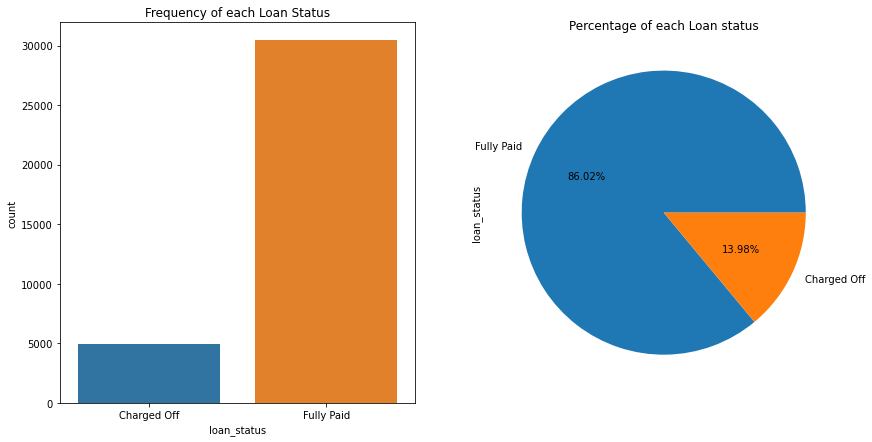

In [176]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=master_loan,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
master_loan.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

### Observations:

These plots show that a significant number of people in our dataset paid off their loan - 86.02% of the borrowers paid their loan but 13.98% people are defaulters! In order to maximize returns we have to identify these defaulters and analyze features of these people.

In [184]:
master_loan.head()

loan_amnt  term_in_months  installment grade  emp_length home_ownership  \
0       2500              60        59.83     C           0           RENT   
1      10000              36       339.31     C          10           RENT   
3       5000              36       156.46     A           3           RENT   
4       7000              60       170.08     C           8           RENT   
5       3000              36       109.43     E           9           RENT   

   annual_inc verification_status  loan_status             purpose  \
0     30000.0     Source Verified  Charged Off                 car   
1     49200.0     Source Verified   Fully Paid               other   
3     36000.0     Source Verified   Fully Paid             wedding   
4     47004.0        Not Verified   Fully Paid  debt_consolidation   
5     48000.0     Source Verified   Fully Paid                 car   

                                   title addr_state    dti  delinq_2yrs  \
0                                   bike         GA   1.00            0   
1                               personel         CA  20.00            0   
3  My wedding loan I promise to pay back         AZ  11.20            0   
4                                   Loan         NC  23.51            0   
5                        Car Downpayment         CA   5.35            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0       1999-04-01               5         3        0       1687         9.4   
1       1996-02-01               1        10        0       5598        21.0   
3       2004-11-01               3         9        0       7963        28.3   
4       2005-07-01               1         7        0      17726        85.6   
5       2007-01-01               2         4        0       8221        87.5   

   total_acc last_credit_pull_d  pub_rec_bankruptcies  earliest_cr_line_month  \
0          4         2013-09-01                   0.0                       4   
1         37         2016-04-01                   0.0                       2   
3         12         2016-01-01                   0.0                      11   
4         11         2016-05-01                   0.0                       7   
5          4         2014-12-01                   0.0                       1   

   earliest_cr_line_year  
0                   1999  
1                   1996  
3                   2004  
4                   2005  
5                   2007

## Variable : loan_amnt

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [185]:
# Lets check loan_amnt

In [186]:
master_loan.loan_amnt.dtype

dtype('int64')

In [187]:
# => It is a numerical variable
# => Boxplots

In [188]:
master_loan.loan_amnt.describe()

count    35367.000000
mean     11133.071790
std       7326.233093
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

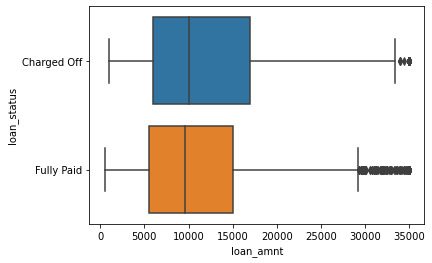

In [189]:
sns.boxplot(x=master_loan["loan_amnt"],y=master_loan.loan_status)
plt.show()

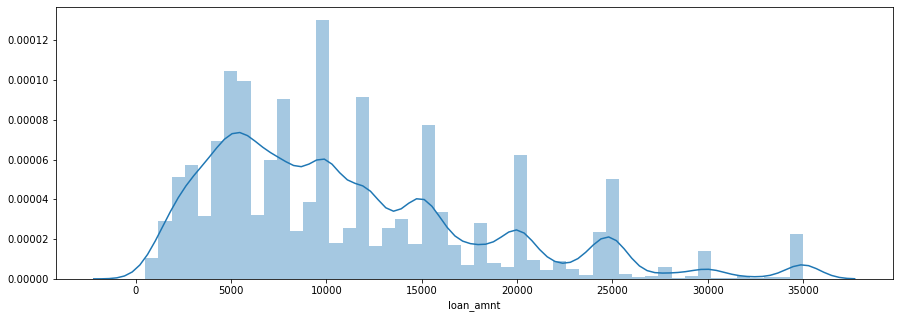

In [192]:
plt.figure(figsize=(15,5))
sns.distplot(master_loan['loan_amnt'])
plt.show()

In [190]:
master_loan.groupby('loan_status')['loan_amnt'].describe()

count          mean          std     min     25%      50%  \
loan_status                                                                
Charged Off   4943.0  12286.147077  8064.255961  1000.0  6000.0  10000.0   
Fully Paid   30424.0  10945.731166  7181.867451   500.0  5500.0   9600.0   

                 75%      max  
loan_status                    
Charged Off  17000.0  35000.0  
Fully Paid   15000.0  35000.0

## Observations:

1. The overall loan amount distribution is slightly <b>right-skewed</b> with mean greater than the median. 
2. Most of the loans are granted below 15000 value (75 percentile value).
3. If we do not consider the outliers, <b>Charged-Off</b> loans are higher than the Fully Paid ones.

In [193]:
# From above lets use binning for every value of 5000

In [194]:
#Create Derived categorical variable
master_loan['loan_amnt_bin'] = pd.cut(master_loan['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])


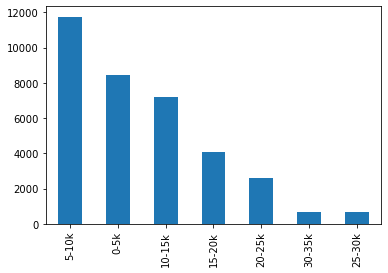

In [196]:
#Plot a bar chart
master_loan["loan_amnt_bin"].value_counts().plot.bar()
plt.show()

In [254]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages 
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [258]:
# This method plots a distribution of a given column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    ax=sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

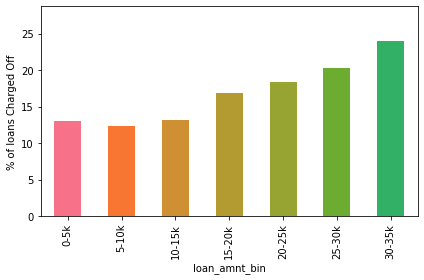

In [204]:
plotLoanStatus(master_loan, 'loan_amnt_bin')
plt.show()

## Observations:

1. Most of the loans are given in the range of 5000 to 10000 category.
2. The percentage of charged loans increases as we go higher in loan amounts. 
3. The higher the loans the higher is the risk of defaulters not paying it.

In [205]:
# Lets see other categorical variables included.

In [206]:
master_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35367 entries, 0 to 36432
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   loan_amnt               35367 non-null  int64   
 1   term_in_months          35367 non-null  int64   
 2   installment             35367 non-null  float64 
 3   grade                   35367 non-null  object  
 4   emp_length              35367 non-null  int64   
 5   home_ownership          35367 non-null  object  
 6   annual_inc              35367 non-null  float64 
 7   verification_status     35367 non-null  object  
 8   loan_status             35367 non-null  object  
 9   purpose                 35367 non-null  object  
 10  title                   35367 non-null  object  
 11  addr_state              35367 non-null  object  
 12  dti                     35367 non-null  float64 
 13  delinq_2yrs             35367 non-null  int64   
 14  earliest_cr_line      

In [232]:
# 
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [233]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
        showLabels(ax)

    plt.tight_layout()

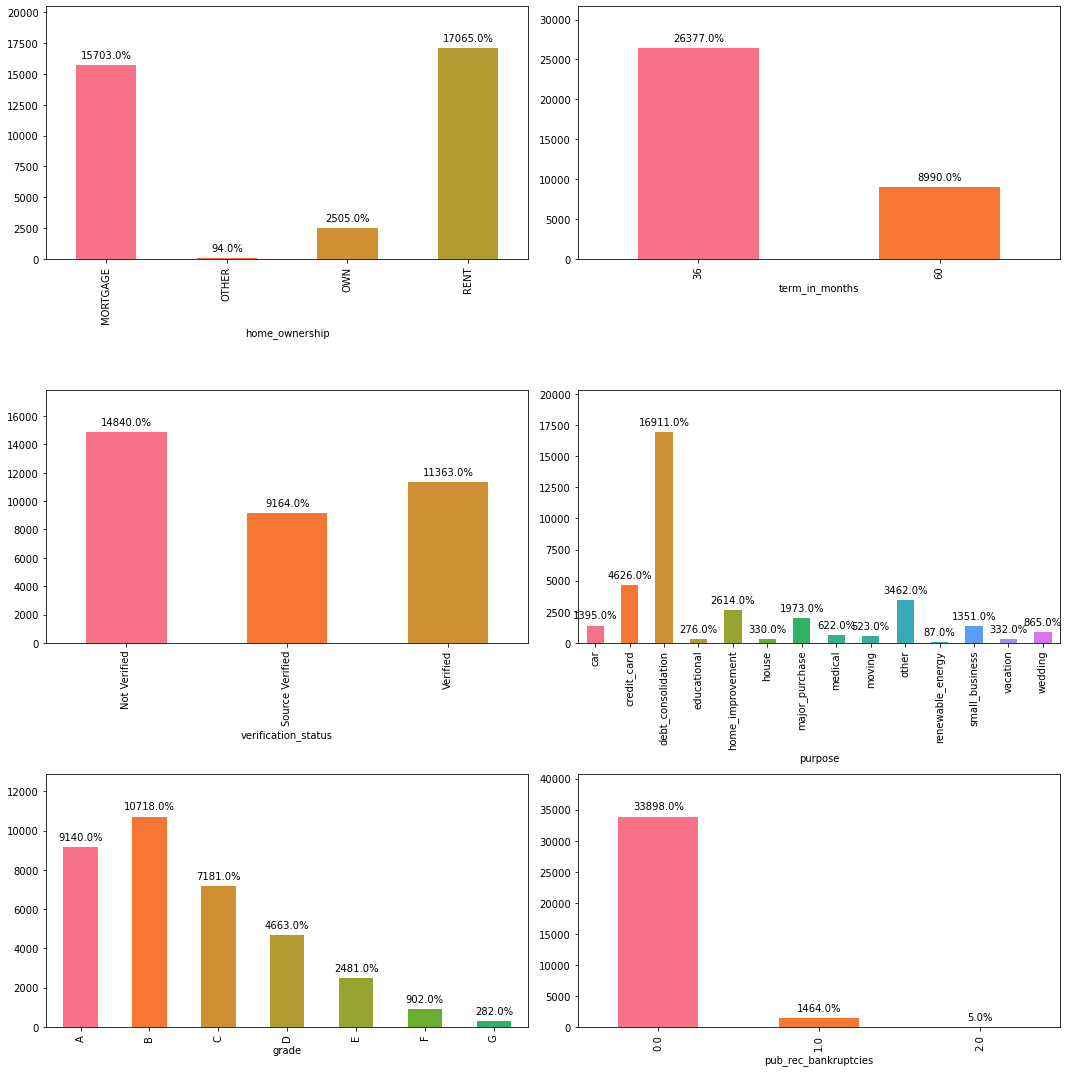

In [236]:
plt.figure(figsize=(15,15))

categoricalBarPlots(master_loan, ['home_ownership', 'term_in_months', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

## Observations:

1. Most of the loans are for 36 months term.
2. Quite a few loans are extended to people with prior bankrupcies. => Needs investigation.
3. Debt consolidation is the biggest purpose for loan seekers.
4. Most approved loan status are of higher grades, the maximum percentage of being B grade.
5. Out of the home ownership status provided by the borrower, Rent and Mortgage are the highest.
6. Shows much concerns of the verification , as most of the income sources go unverified!! Which should be alarming.

C:\Users\Rishabh\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\Rishabh\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\Rishabh\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


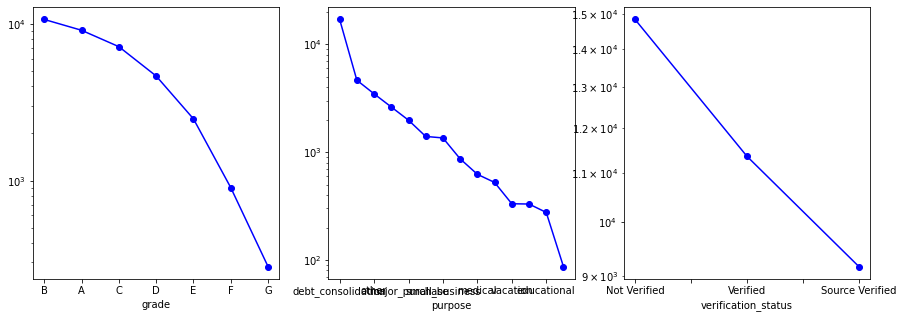

In [243]:
#Let's see if some of these variables follow the famous power law.
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
master_loan.groupby('grade')["loan_amnt"].count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(1, 3, 2)
master_loan.groupby('purpose')["loan_amnt"].count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(1, 3, 3)
master_loan.groupby('verification_status').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')

plt.show()

## Observations:

1. Purpose follows the Power Law.
2. Verification_Status follows the Power Law

In [245]:
master_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35367 entries, 0 to 36432
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   loan_amnt               35367 non-null  int64   
 1   term_in_months          35367 non-null  int64   
 2   installment             35367 non-null  float64 
 3   grade                   35367 non-null  object  
 4   emp_length              35367 non-null  int64   
 5   home_ownership          35367 non-null  object  
 6   annual_inc              35367 non-null  float64 
 7   verification_status     35367 non-null  object  
 8   loan_status             35367 non-null  object  
 9   purpose                 35367 non-null  object  
 10  title                   35367 non-null  object  
 11  addr_state              35367 non-null  object  
 12  dti                     35367 non-null  float64 
 13  delinq_2yrs             35367 non-null  int64   
 14  earliest_cr_line      

## Variable : term_in_months 

The number of payments on the loan. Values are in months and can be either 36 or 60.

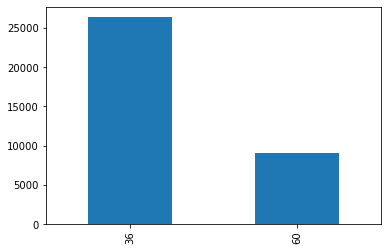

In [246]:
#Plot a bar chart
master_loan["term_in_months"].value_counts().plot.bar()
plt.show()

In [249]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (master_loan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    #ax = master_loan.groupby('loan_status')['term'].value_counts(normalize=True).loc[:'Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
    values = (master_loan.loc[master_loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    showLabels(ax)

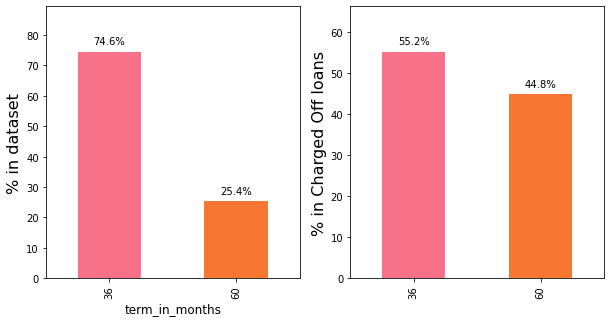

In [250]:
plt.figure(figsize=(10,5))
plot_percentages(master_loan, 'term_in_months')

## Observations :

1. Around 75% of the loans are given for 3 years, and around 25% loans are given for 5 years.
2. The percentage of Charged-off loans increases with the increase in time the loan amount is given.

In [251]:
master_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35367 entries, 0 to 36432
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   loan_amnt               35367 non-null  int64   
 1   term_in_months          35367 non-null  int64   
 2   installment             35367 non-null  float64 
 3   grade                   35367 non-null  object  
 4   emp_length              35367 non-null  int64   
 5   home_ownership          35367 non-null  object  
 6   annual_inc              35367 non-null  float64 
 7   verification_status     35367 non-null  object  
 8   loan_status             35367 non-null  object  
 9   purpose                 35367 non-null  object  
 10  title                   35367 non-null  object  
 11  addr_state              35367 non-null  object  
 12  dti                     35367 non-null  float64 
 13  delinq_2yrs             35367 non-null  int64   
 14  earliest_cr_line      

## Variable : purpose

A category provided by the borrower for the loan request. 

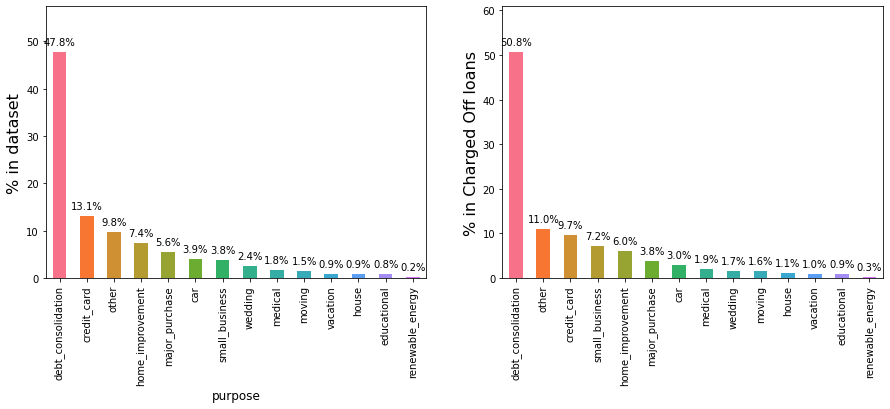

In [252]:
plt.figure(figsize=(15,5))
plot_percentages(master_loan, 'purpose')

## Observations:

1. The percentage of Small Business category changes from 3.8% to 7.2% for Charged-off loans.
2. Almost 49% of the loans in this dataset are issued for debt consolidation.

<AxesSubplot:xlabel='purpose', ylabel='% of loans Charged Off'>

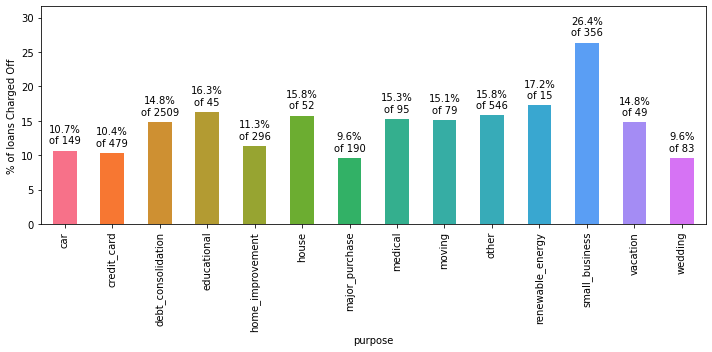

In [255]:
plt.figure(figsize=(10, 5))
plotLoanStatus(master_loan, 'purpose')

## Observations :

1. Almost 26% of Small Business loans are Charged-off, making it the most riskiest category to give loans.
2. The second most risky category is renewable energy.

In [256]:
master_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35367 entries, 0 to 36432
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   loan_amnt               35367 non-null  int64   
 1   term_in_months          35367 non-null  int64   
 2   installment             35367 non-null  float64 
 3   grade                   35367 non-null  object  
 4   emp_length              35367 non-null  int64   
 5   home_ownership          35367 non-null  object  
 6   annual_inc              35367 non-null  float64 
 7   verification_status     35367 non-null  object  
 8   loan_status             35367 non-null  object  
 9   purpose                 35367 non-null  object  
 10  title                   35367 non-null  object  
 11  addr_state              35367 non-null  object  
 12  dti                     35367 non-null  float64 
 13  delinq_2yrs             35367 non-null  int64   
 14  earliest_cr_line      

## Variable : pub_rec_bankruptcies

Number of public record bankruptcies.

In [257]:
master_loan.pub_rec_bankruptcies.dtype

dtype('float64')

<Figure size 504x360 with 0 Axes>

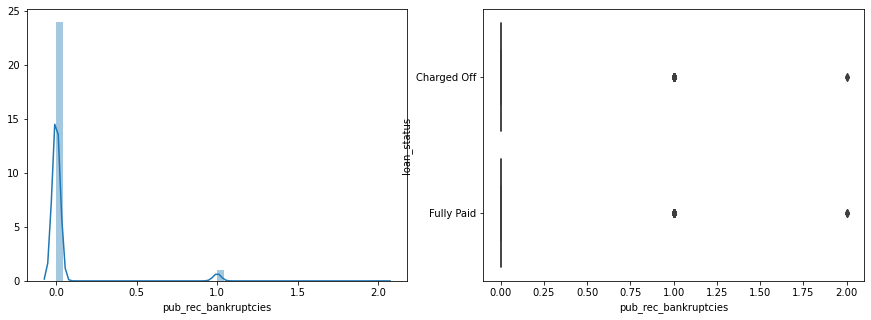

In [260]:
plt.figure(figsize=(7,5))
#plot_distribution(dataframe, col)
plot_distribution(master_loan,'pub_rec_bankruptcies')

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='% of loans Charged Off'>

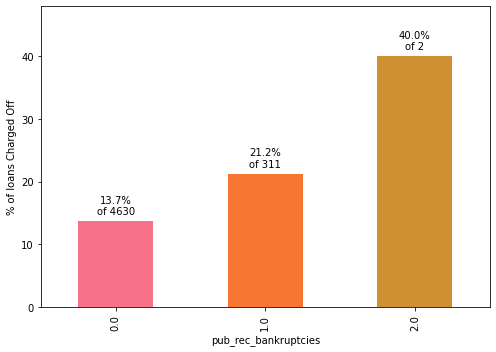

In [261]:
plt.figure(figsize=(7,5))
plotLoanStatus(master_loan, 'pub_rec_bankruptcies')

## Observations :

1. Most of the loans in this case has 0 backrupcies, which is good in general.
2. The higher the bankrupcies , more likely to be the risk to approve the loan. From the graph it is increasing exponencially which can have adverse effects!

## Variable : grade

LC assigned loan grade.

In [262]:
master_loan.grade.value_counts()

B    10718
A     9140
C     7181
D     4663
E     2481
F      902
G      282
Name: grade, dtype: int64

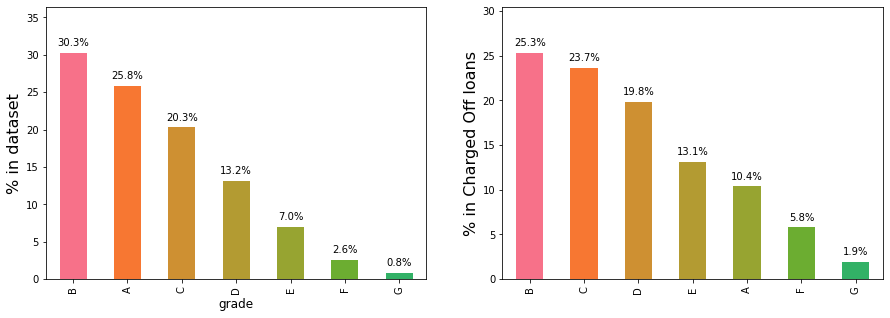

In [265]:
plt.figure(figsize=(15,5))
plot_percentages(master_loan, 'grade')

<AxesSubplot:xlabel='grade', ylabel='% of loans Charged Off'>

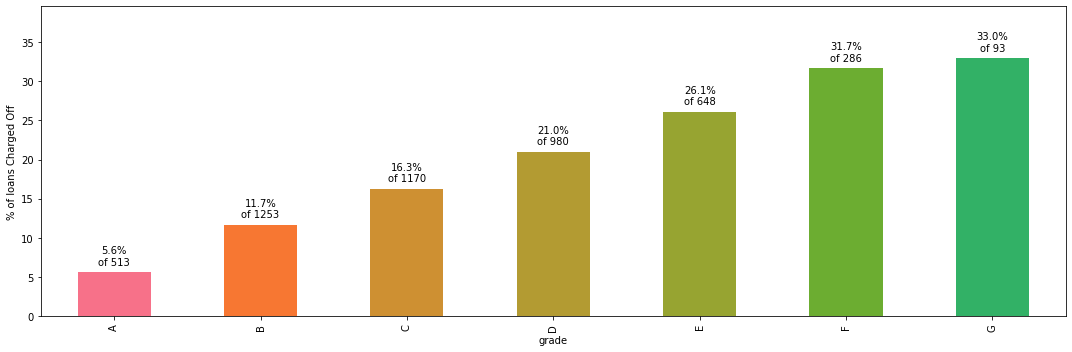

In [267]:
plt.figure(figsize=(15,5))
plotLoanStatus(master_loan, 'grade')

## Observations :

1. Grades A and B are much safer than the rest of the grades.
2. From grades A to G, as we move from left to right, the more riskier it becomes to lend the loans. Giving loans for cateogies F and G could result in the maximum loss. => They should either reject the loans or can provide higher interest rates. 

In [268]:
# Looking at more variables from which we can analyze:

master_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35367 entries, 0 to 36432
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   loan_amnt               35367 non-null  int64   
 1   term_in_months          35367 non-null  int64   
 2   installment             35367 non-null  float64 
 3   grade                   35367 non-null  object  
 4   emp_length              35367 non-null  int64   
 5   home_ownership          35367 non-null  object  
 6   annual_inc              35367 non-null  float64 
 7   verification_status     35367 non-null  object  
 8   loan_status             35367 non-null  object  
 9   purpose                 35367 non-null  object  
 10  title                   35367 non-null  object  
 11  addr_state              35367 non-null  object  
 12  dti                     35367 non-null  float64 
 13  delinq_2yrs             35367 non-null  int64   
 14  earliest_cr_line      

## Variable : installment

Months since oldest bank installment account opened.

In [271]:
master_loan.installment.describe()

count    35367.000000
mean       324.043982
std        207.149088
min         16.080000
25%        167.840000
50%        280.620000
75%        426.640000
max       1305.190000
Name: installment, dtype: float64

<Figure size 1080x360 with 0 Axes>

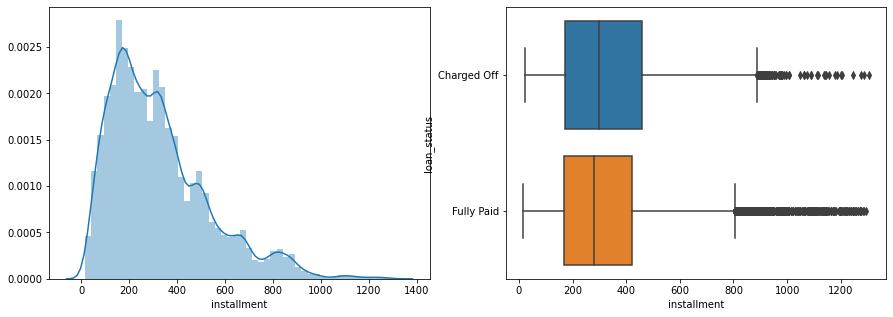

In [272]:
plt.figure(figsize=(15,5))
plot_distribution(master_loan,'installment')

In [274]:
master_loan.groupby('loan_status')['installment'].describe()

count        mean         std    min       25%     50%  \
loan_status                                                             
Charged Off   4943.0  338.848452  214.527655  22.79  172.4350  298.33   
Fully Paid   30424.0  321.638693  205.828423  16.08  167.2975  278.24   

                  75%      max  
loan_status                     
Charged Off  458.3150  1305.19  
Fully Paid   422.3075  1295.21

## Observations :

1. Most of the Installments lie in the range of 170 to 420 , with 280 as the median.
2. Charged-off loans have higher installment rates on an average as compared to fully charged ones.

## Variable : emp_length

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [277]:
# normalize : bool, default False
#If True then the object returned will contain the relative frequencies of the unique values.

In [279]:
master_loan.emp_length.value_counts(normalize=True)

10    0.226991
2     0.115447
0     0.112478
3     0.108378
4     0.090649
5     0.086041
1     0.083666
6     0.058303
7     0.046314
8     0.038482
9     0.033251
Name: emp_length, dtype: float64

<AxesSubplot:xlabel='emp_length', ylabel='% of loans Charged Off'>

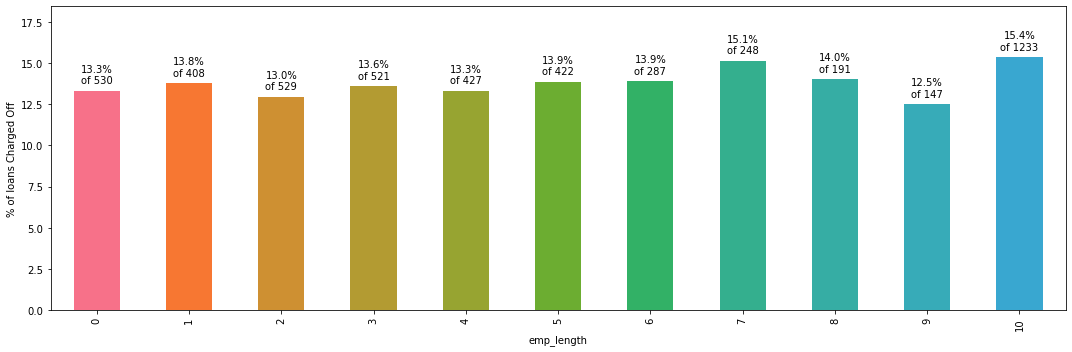

In [280]:
plt.figure(figsize=(15,5))
plotLoanStatus(master_loan, 'emp_length')

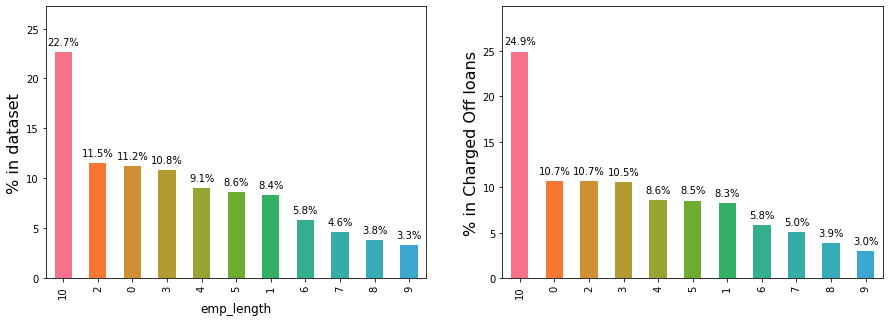

In [281]:
plt.figure(figsize=(15,5))
plot_percentages(master_loan, 'emp_length')

## Observations :

1. Around 23% of the loan takers have employment of more than 10 years.
2. Employment length has no effect on the percentage of defaulters.

## Variable : home_ownership

The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [282]:
master_loan.home_ownership.value_counts()

RENT        17065
MORTGAGE    15703
OWN          2505
OTHER          94
Name: home_ownership, dtype: int64

<AxesSubplot:xlabel='home_ownership', ylabel='% of loans Charged Off'>

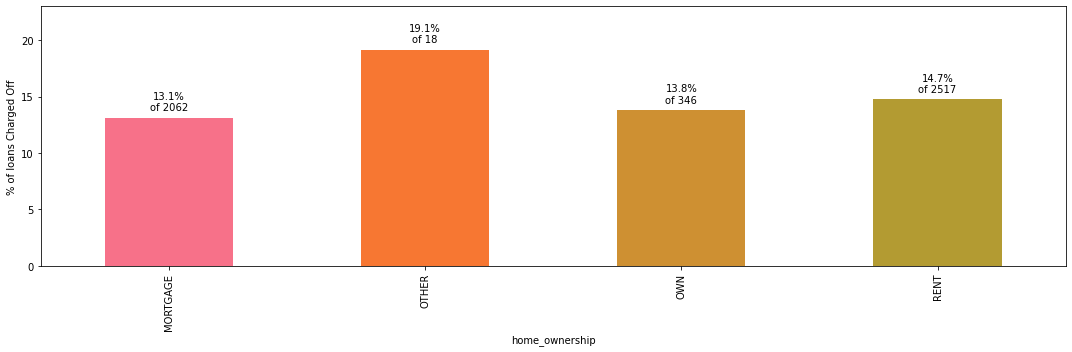

In [283]:
plt.figure(figsize=(15,5))
plotLoanStatus(master_loan, 'home_ownership')

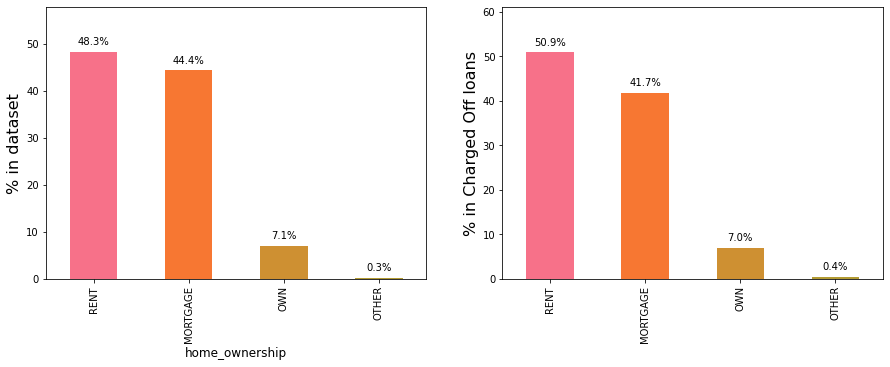

In [285]:
plt.figure(figsize=(15,5))
plot_percentages(master_loan, 'home_ownership')

## Observations :

1. There seems to be no impact of home ownership to the loan status.

## Variable : annual_inc

The self-reported annual income provided by the borrower during registration.

In [286]:
master_loan.annual_inc.describe()

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [302]:
master_loan.annual_inc.min()

4000.0

In [298]:
pd.set_option('float_format', '{:f}'.format)

In [299]:
master_loan.annual_inc.describe()

count     35367.000000
mean      69095.985393
std       63967.047428
min        4000.000000
25%       41500.000000
50%       60000.000000
75%       82500.000000
max     6000000.000000
Name: annual_inc, dtype: float64

<Figure size 1080x360 with 0 Axes>

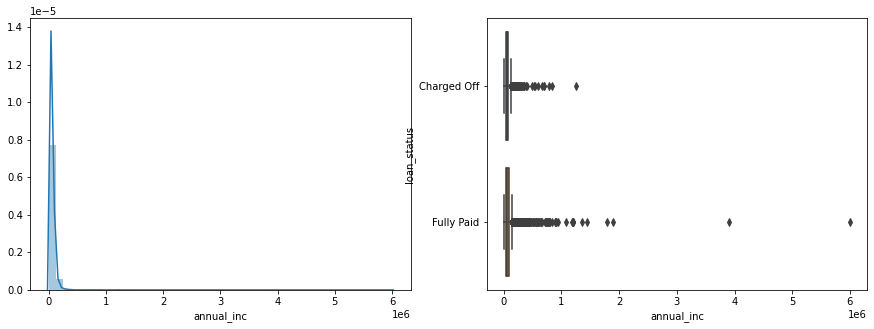

In [300]:
plt.figure(figsize=(15,5))
plot_distribution(master_loan,'annual_inc')

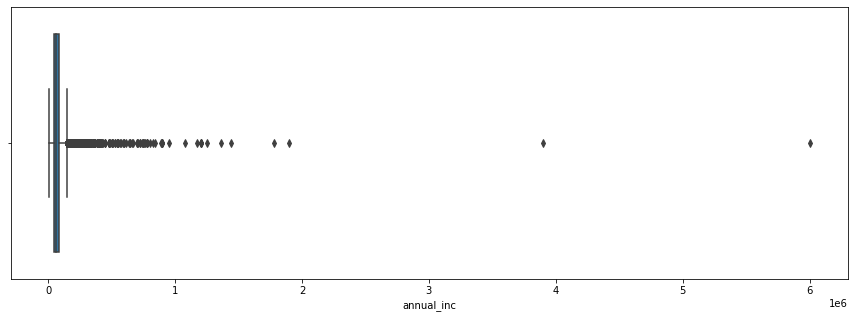

In [301]:
# Lets plot the boxplot for the column -- annual_inc
plt.figure(figsize=(15,5))
sns.boxplot(x=master_loan.annual_inc,data=master_loan)
plt.show()

In [303]:
master_loan.annual_inc.describe(percentiles=[0.1, 0.30, 0.50, 0.70, 0.90])

count     35367.000000
mean      69095.985393
std       63967.047428
min        4000.000000
10%       30000.000000
30%       45000.000000
50%       60000.000000
70%       76000.000000
90%      115000.000000
max     6000000.000000
Name: annual_inc, dtype: float64

## Observations :

1. Annual income ranges from 4000 to 600000. This dataset for this column contains many outliers.
2. Median annual income is 60000.
3. Most of the people (around 90%) have annual salaries less than 115000.

In [304]:
# This variable has more scope. Lets clear the outliers to analyse more on this variable.

In [305]:
# As the data is highly right-skewed, we can take "standard deviation" as a metric to dive into it further and remove the outliers.

In [306]:
# Lets take the standard deviation range of -3 to +3 and analyze.
inp1 = master_loan[np.abs(master_loan.annual_inc - master_loan.annual_inc.mean()) <= (master_loan.annual_inc.std() * 3)]

In [308]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35122 entries, 0 to 36432
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   loan_amnt               35122 non-null  int64   
 1   term_in_months          35122 non-null  int64   
 2   installment             35122 non-null  float64 
 3   grade                   35122 non-null  object  
 4   emp_length              35122 non-null  int64   
 5   home_ownership          35122 non-null  object  
 6   annual_inc              35122 non-null  float64 
 7   verification_status     35122 non-null  object  
 8   loan_status             35122 non-null  object  
 9   purpose                 35122 non-null  object  
 10  title                   35122 non-null  object  
 11  addr_state              35122 non-null  object  
 12  dti                     35122 non-null  float64 
 13  delinq_2yrs             35122 non-null  int64   
 14  earliest_cr_line      

In [309]:
inp1.annual_inc.describe()

count    35122.000000
mean     66255.515193
std      35749.840874
min       4000.000000
25%      41004.000000
50%      59449.000000
75%      81969.000000
max     260000.000000
Name: annual_inc, dtype: float64

<Figure size 1080x360 with 0 Axes>

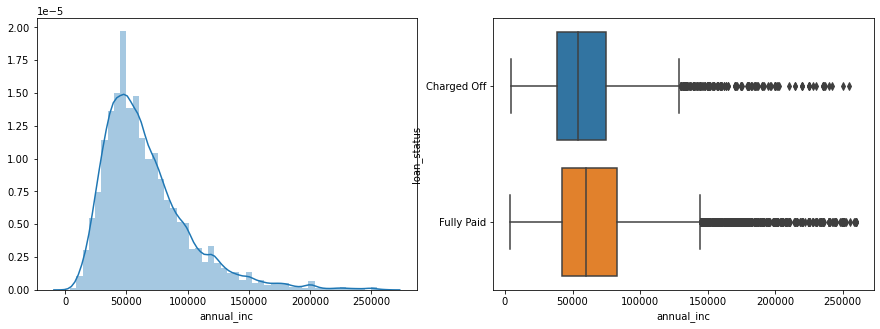

In [310]:
# Now we can use the same functions to analyze.

plt.figure(figsize=(15,5))
plot_distribution(inp1,'annual_inc')

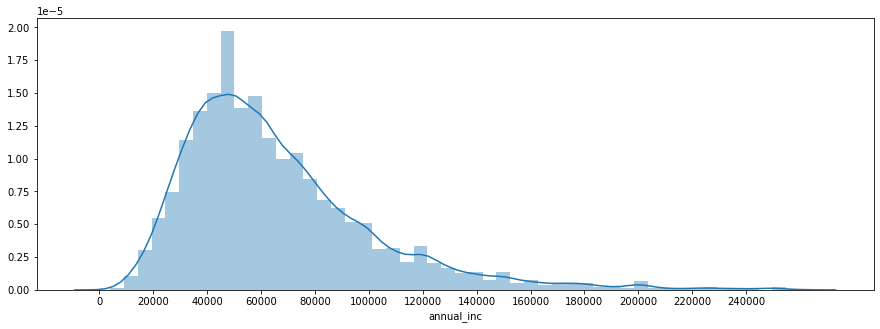

In [315]:
# Lets see the distplot only.
plt.figure(figsize=(15,5))
sns.distplot(inp1.annual_inc)
plt.xticks(np.arange(0,260000,20000))
plt.show()

In [316]:
# Binning --> Lets further create categories of it.
# Lets take the bins in the range of 20000.

In [317]:
master_loan["annual_inc_bin"] = master_loan.annual_inc/20000

In [318]:
master_loan.annual_inc_bin.dtype

dtype('float64')

In [327]:
master_loan.annual_inc_bin = master_loan.annual_inc_bin.astype('int')

In [328]:
master_loan.annual_inc_bin.describe()

count   35367.000000
mean        3.013204
std         3.235138
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max       300.000000
Name: annual_inc_bin, dtype: float64

In [329]:
inp1.annual_inc.describe()

count    35122.000000
mean     66255.515193
std      35749.840874
min       4000.000000
25%      41004.000000
50%      59449.000000
75%      81969.000000
max     260000.000000
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc_bin', ylabel='% of loans Charged Off'>

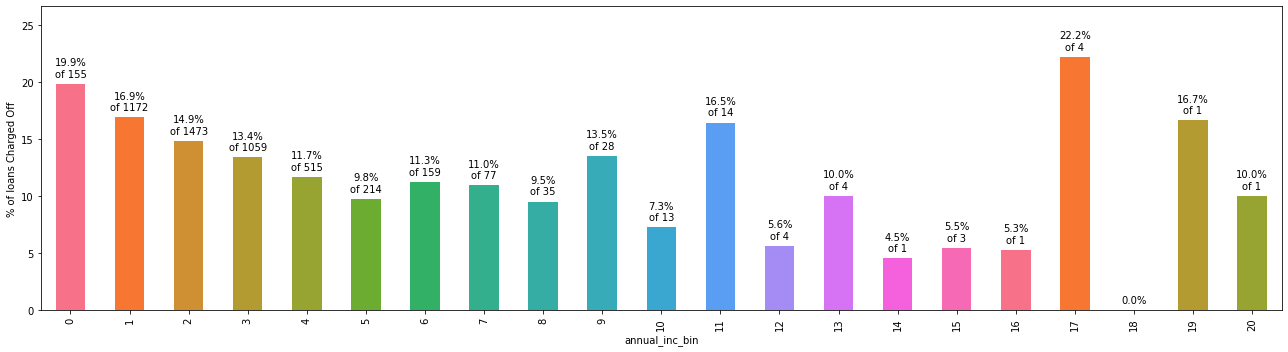

In [332]:
plt.figure(figsize=(18,5))
plotLoanStatus(master_loan.loc[master_loan["annual_inc_bin"] < 21],'annual_inc_bin')

## Observations :

1. Loan defaults is inversely proportional to the income. Low incomes have higher loan defaults.

## Variable : verification_status

Indicates if income was verified by LC, not verified, or if the income source was verified.

In [333]:
master_loan.verification_status.value_counts()

Not Verified       14840
Verified           11363
Source Verified     9164
Name: verification_status, dtype: int64

<AxesSubplot:xlabel='verification_status', ylabel='% of loans Charged Off'>

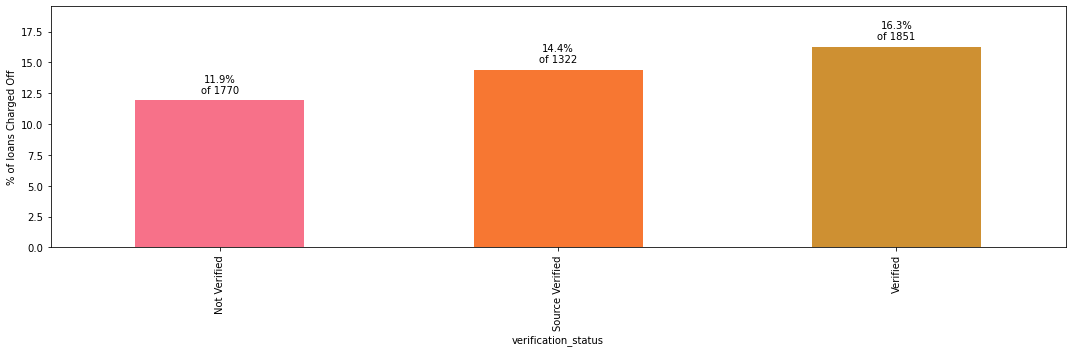

In [334]:
plt.figure(figsize=(15,5))
plotLoanStatus(master_loan, 'verification_status')

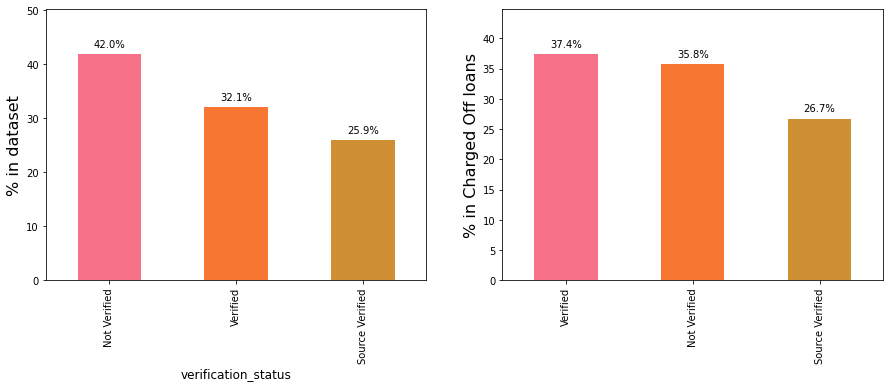

In [335]:
plt.figure(figsize=(15,5))
plot_percentages(master_loan, 'verification_status')

## Observation :

1. In this dataset there are more non-verfied loans than verified or source verified. Lending Club should take steps to verify each and everything to avoid charge-off loan status.
2. Something unexpected to note here is that verified and source verified loans show more charged-off percentage than the non-verified ones. There can be many negative reasons. <b>Lets take this up in bivariate analysis afterwards.</b>

## Variable : title

The loan title provided by the borrower.

In [336]:
master_loan.title.value_counts()

Debt Consolidation                                                                   1975
Debt Consolidation Loan                                                              1541
Personal Loan                                                                         589
Consolidation                                                                         462
debt consolidation                                                                    440
Credit Card Consolidation                                                             325
Home Improvement                                                                      324
Debt consolidation                                                                    303
Personal                                                                              281
Credit Card Loan                                                                      280
Consolidation Loan                                                                    242
Small Busi

In [337]:
master_loan.title.describe()

count                  35367
unique                 17662
top       Debt Consolidation
freq                    1975
Name: title, dtype: object

In [338]:
# This column can be rejected due to point 5 (redundant column). It is same as "purpose" column which we analyzed earlier.

In [339]:
master_loan = master_loan.drop("title",axis=1)

## Variable : addr_state

The state provided by the borrower in the loan application.

In [340]:
master_loan.addr_state.value_counts()

CA    6396
NY    3386
FL    2535
TX    2453
NJ    1667
IL    1381
PA    1373
VA    1260
GA    1253
MA    1181
OH    1096
MD     950
AZ     758
WA     720
CO     682
NC     672
CT     654
MI     641
MO     609
MN     554
NV     442
SC     422
AL     397
OR     397
LA     389
WI     387
KY     293
OK     272
KS     233
UT     229
AR     216
DC     203
RI     185
NM     163
WV     157
HI     153
NH     148
DE     105
WY      75
AK      73
MT      71
SD      55
VT      47
MS      18
TN      10
ID       3
IN       1
NE       1
IA       1
Name: addr_state, dtype: int64

<AxesSubplot:xlabel='addr_state', ylabel='% of loans Charged Off'>

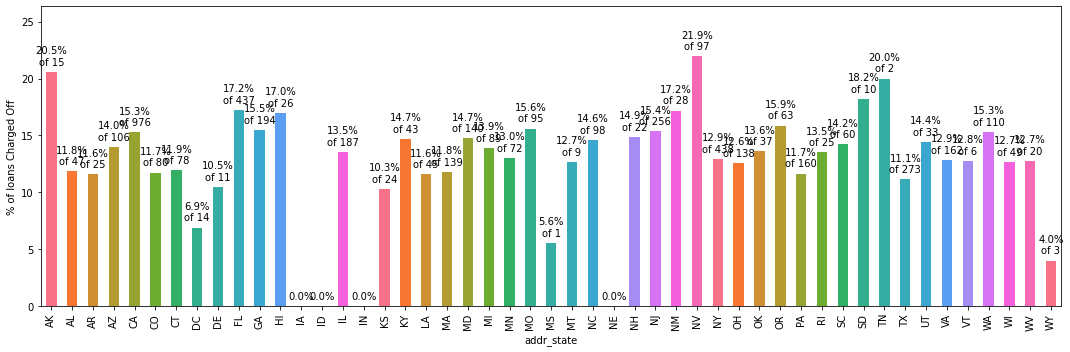

In [341]:
plt.figure(figsize=(15,5))
plotLoanStatus(master_loan, 'addr_state')

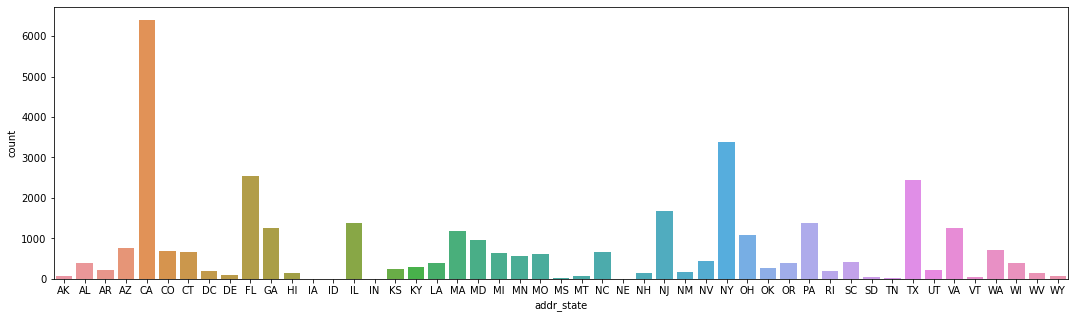

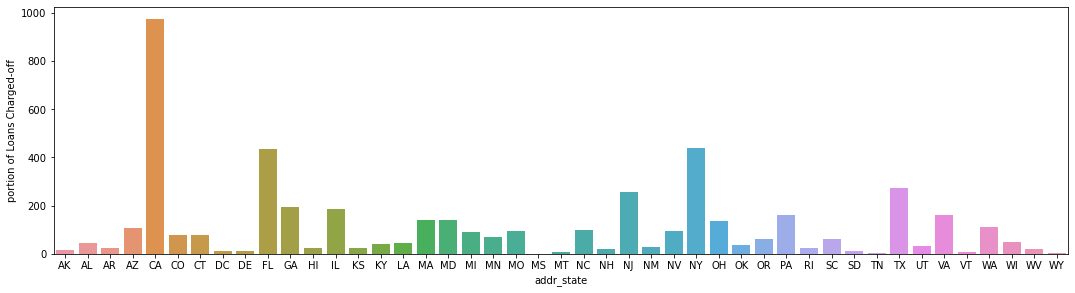

In [345]:
plt.figure(figsize=(40,5))
plt.subplot(1, 2, 1)
sns.countplot(master_loan['addr_state'], order=sorted(master_loan.addr_state.unique()))

#Fraction of loans charged off and fully Paid
charge_off_count = master_loan.groupby('addr_state')['loan_status'].value_counts().loc[:,'Charged Off']  
Fully_paid_count = master_loan.groupby('addr_state')['loan_status'].value_counts().loc[:,'Fully Paid']  

plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=charge_off_count.index, y=charge_off_count.values)
a.set_ylabel('portion of Loans Charged-off')
plt.show()

## Observations :

1. Most of the loans in this dataset are from California, followed by New York.
2. But this variable does account for any loan defaulters, and can be ignored. This could have made sense if the count remains the same for all the states, which is not in this dataset.

## Variable : dti

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [346]:
master_loan.dti.describe()

count   35367.000000
mean       13.403961
std         6.636540
min         0.000000
25%         8.320000
50%        13.500000
75%        18.640000
max        29.990000
Name: dti, dtype: float64

<Figure size 1080x360 with 0 Axes>

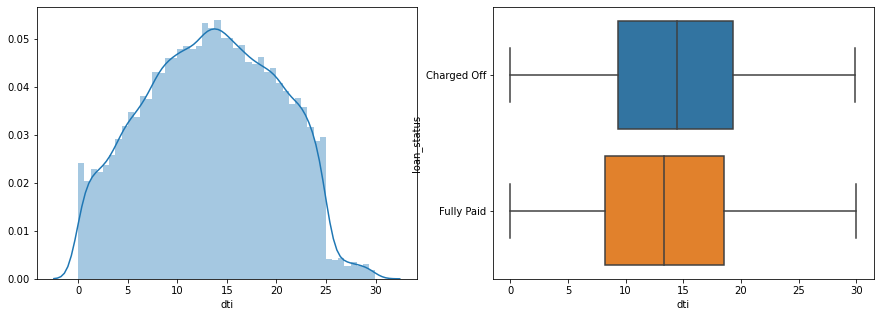

In [347]:
plt.figure(figsize=(15,5))
plot_distribution(master_loan,'dti') 

In [350]:
#plt.figure(figsize=(15,5))
#plot_percentages(master_loan, 'dti')

# Lets create some bins to analyze more.

In [355]:
master_loan["dti_bin"] = pd.cut(master_loan["dti"],[0,5,10,15,20,25,30],labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

<AxesSubplot:xlabel='dti_bin', ylabel='% of loans Charged Off'>

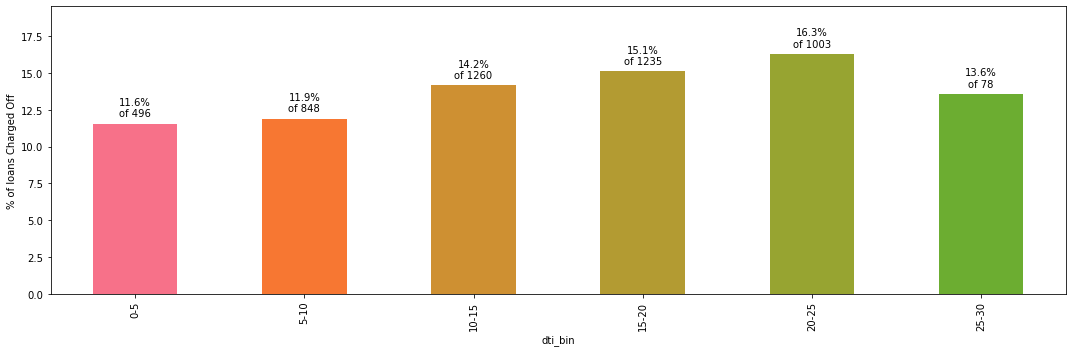

In [356]:
plt.figure(figsize=(15,5))
plotLoanStatus(master_loan, 'dti_bin')

## Observations :

1. Higher percentage of loans are charged-off when dti ratio is more than 20.
2. dti is directly proportional to loan status. Higher the dti higher is the possibility of loan being charged-off.

## Variable : delinq_2yrs

The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.

In [357]:
master_loan.delinq_2yrs.describe()

count   35367.000000
mean        0.146323
std         0.493060
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        11.000000
Name: delinq_2yrs, dtype: float64

In [359]:
 master_loan.delinq_2yrs.value_counts().count()

11

In [360]:
 master_loan.delinq_2yrs.value_counts()

0     31533
1      2939
2       614
3       189
4        53
5        21
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64

<AxesSubplot:xlabel='delinq_2yrs', ylabel='% of loans Charged Off'>

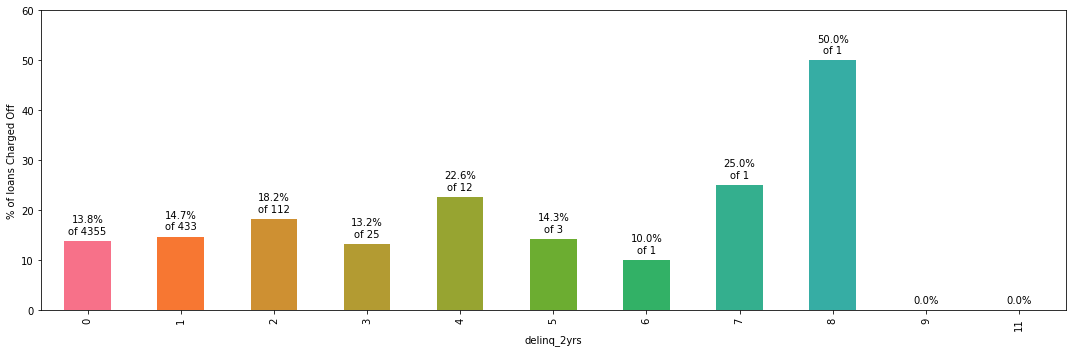

In [361]:
plt.figure(figsize=(15,5))
plotLoanStatus(master_loan, 'delinq_2yrs')

## Observation :

1. Most of the counts in this data set is non-delinquent. 
2. There is a possibility of higher chances of loan defaulters when delinq_2yrs is >= 1.

## Variable : earliest_cr_line

The month the borrower's earliest reported credit line was opened.

In [363]:
master_loan.earliest_cr_line.value_counts().head()

1999-10-01    342
1998-11-01    341
1998-12-01    319
2000-10-01    315
1999-11-01    294
Name: earliest_cr_line, dtype: int64

<AxesSubplot:xlabel='earliest_cr_line_year'>

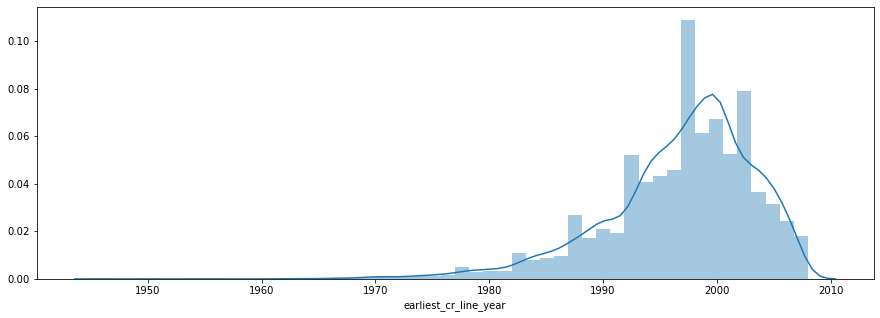

In [366]:
plt.figure(figsize=(15,5))
sns.distplot(master_loan['earliest_cr_line_year'])

In [367]:
# Since our main analysis is more towards right side, we can ignore the left ones.
# From the displot above, we can see the years are above 1969.

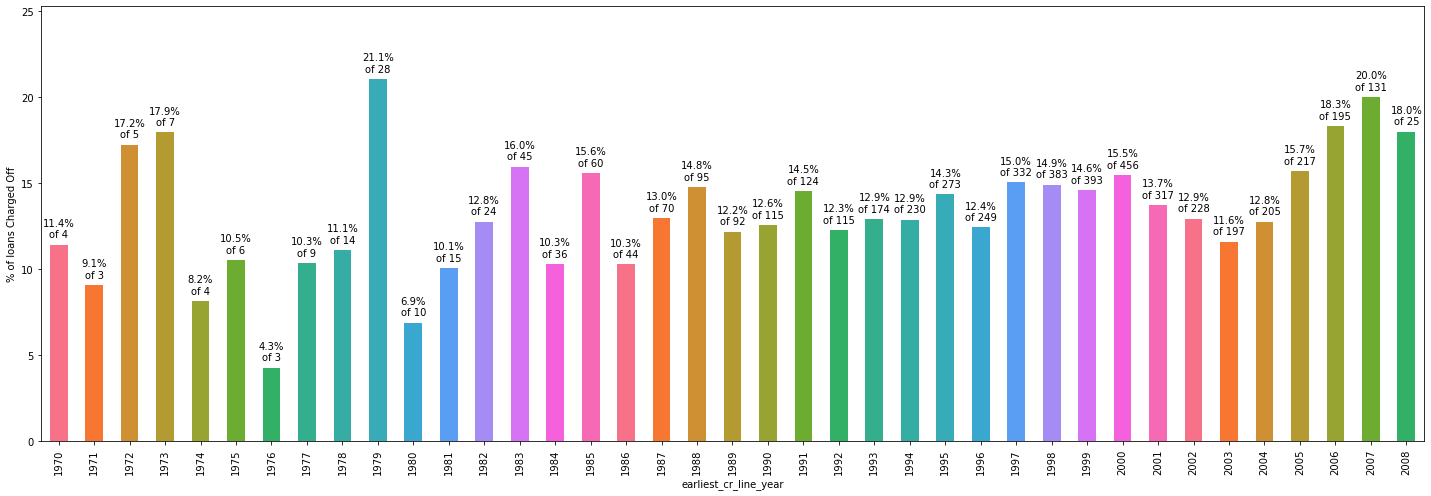

In [371]:
plt.figure(figsize=(20,7))
plotLoanStatus(master_loan.loc[master_loan['earliest_cr_line_year'] > 1969], 'earliest_cr_line_year')
plt.show()

## Observations :

1. 8% of the loan applicants have 2000 as the earliest credit line.
2. The percentage charge-off tends to rise with years greater than 2003. This can be due to a global crisis of any country crisis which we should investigate from other data sets.

## Variable : inq_last_6mths

The number of inquiries in past 6 months (excluding auto and mortgage inquiries.

In [372]:
master_loan.inq_last_6mths.describe()

count   35367.000000
mean        0.866995
std         1.064434
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         8.000000
Name: inq_last_6mths, dtype: float64

<AxesSubplot:xlabel='inq_last_6mths', ylabel='% of loans Charged Off'>

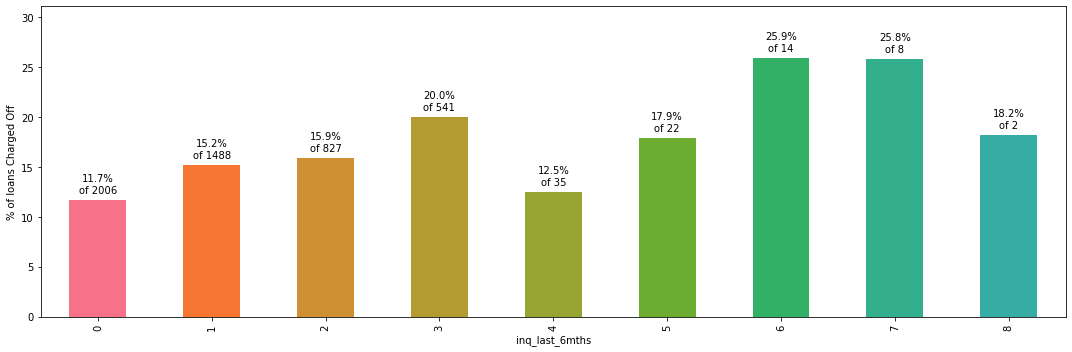

In [374]:
plt.figure(figsize=(15,5))
plotLoanStatus(master_loan, 'inq_last_6mths')

## Observations :

1. In this data set there are most number of persons having no enquiry in last 6 months.
2. Higher number of inquiries tends to more defaulters. But this is when loan is paid, so it can be ignored.

## Variable : open_acc

The number of open credit lines in the borrower's credit file.

In [375]:
master_loan.open_acc.describe()

count   35367.000000
mean        9.332004
std         4.374975
min         2.000000
25%         6.000000
50%         9.000000
75%        12.000000
max        44.000000
Name: open_acc, dtype: float64

<Figure size 1080x360 with 0 Axes>

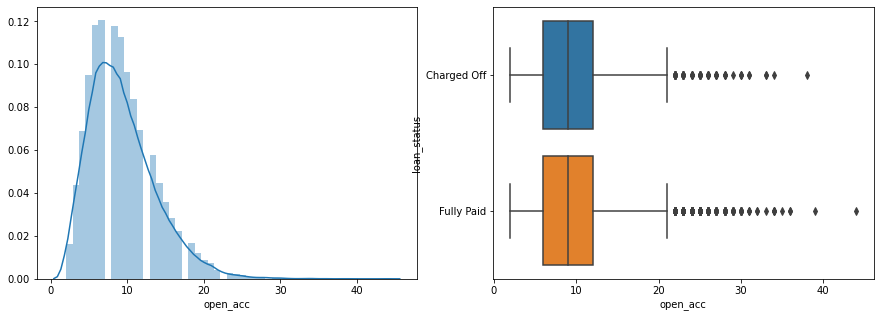

In [376]:
plt.figure(figsize=(15,5))
plot_distribution(master_loan,'open_acc')

In [377]:
master_loan.groupby('loan_status')['open_acc'].describe()

count     mean      std      min      25%      50%  \
loan_status                                                             
Charged Off  4943.000000 9.308517 4.491786 2.000000 6.000000 9.000000   
Fully Paid  30424.000000 9.335820 4.355764 2.000000 6.000000 9.000000   

                  75%       max  
loan_status                      
Charged Off 12.000000 38.000000  
Fully Paid  12.000000 44.000000

## Observations :

1. Seems that a large number of borrowers opened 9 credit lines.
2. Fully Paid and Charged-off have almost same credit lines.

## Variable : pub_rec

Number of derogatory public records.

In [380]:
master_loan.pub_rec.value_counts()

0    33516
1     1798
2       44
3        7
4        2
Name: pub_rec, dtype: int64

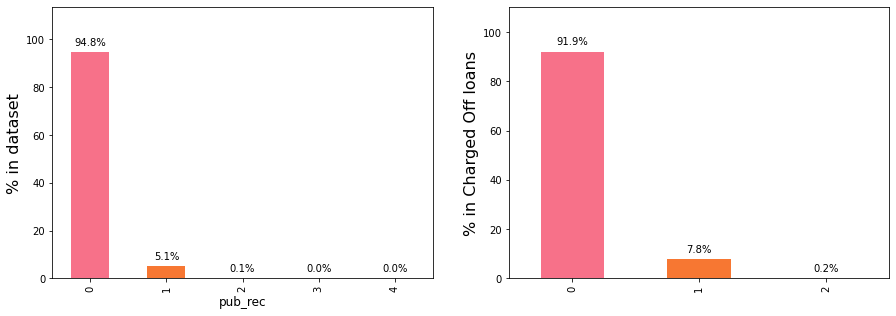

In [381]:
plt.figure(figsize=(15,5))
plot_percentages(master_loan, 'pub_rec')

## Observations :

1. Almost 95% of the people in this dataset have no derogatory public records.
2. Having 1 derogatory records increases the chances of loan being charged-off.

## Variable : revol_bal

Total credit revolving balance.

In [382]:
master_loan.revol_bal.describe()

count    35367.000000
mean     13367.676733
std      15678.460397
min          0.000000
25%       3782.000000
50%       8934.000000
75%      17064.500000
max     149588.000000
Name: revol_bal, dtype: float64

<Figure size 1080x360 with 0 Axes>

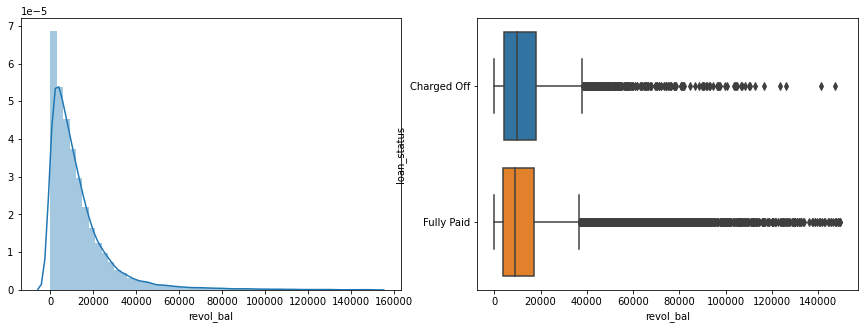

In [383]:
plt.figure(figsize=(15,5))
plot_distribution(master_loan,'revol_bal')

## Observations :

1. Can see no difference between fully paid and charged off loans.

## Variable : revol_util

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [384]:
master_loan.revol_util.describe()

count   35367.000000
mean       49.139015
std        28.228038
min         0.000000
25%        25.900000
50%        49.700000
75%        72.600000
max        99.900000
Name: revol_util, dtype: float64

<Figure size 1080x360 with 0 Axes>

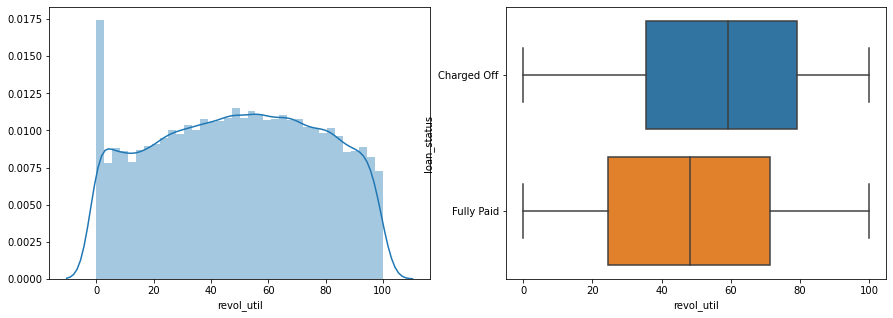

In [385]:
plt.figure(figsize=(15,5))
plot_distribution(master_loan,'revol_util')

In [386]:
master_loan.groupby('loan_status')['revol_util'].describe()

count      mean       std      min       25%       50%  \
loan_status                                                                 
Charged Off  4943.000000 56.157504 27.649831 0.000000 35.450000 59.300000   
Fully Paid  30424.000000 47.998719 28.156580 0.000000 24.500000 48.200000   

                  75%       max  
loan_status                      
Charged Off 79.200000 99.900000  
Fully Paid  71.200000 99.900000

## Observations :

1. The average revolving line utilization rate is around 50%.
2. Charged-off revolving rate is more than fully paid ones.

## Variable : total_acc

The total number of credit lines currently in the borrower's credit file.

In [387]:
master_loan.total_acc.describe()

count   35367.000000
mean       22.209206
std        11.403045
min         2.000000
25%        14.000000
50%        21.000000
75%        29.000000
max        90.000000
Name: total_acc, dtype: float64

<Figure size 1080x360 with 0 Axes>

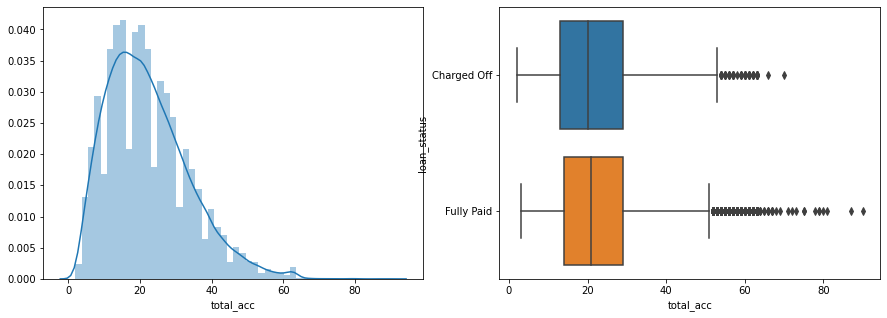

In [388]:
plt.figure(figsize=(15,5))
plot_distribution(master_loan,'total_acc')

In [389]:
master_loan.groupby('loan_status')['total_acc'].describe()

count      mean       std      min       25%       50%  \
loan_status                                                                 
Charged Off  4943.000000 21.730123 11.438113 2.000000 13.000000 20.000000   
Fully Paid  30424.000000 22.287043 11.395624 3.000000 14.000000 21.000000   

                  75%       max  
loan_status                      
Charged Off 29.000000 70.000000  
Fully Paid  29.000000 90.000000

## Observations :

1. Not much difference between fully paid and charged off loans. Median is slightly greater for Fully Paid.

## Variable : last_credit_pull_d

The most recent month LC pulled credit for this loan.

In [390]:
master_loan.last_credit_pull_d.value_counts()

2016-05-01    8718
2016-04-01    2232
2016-03-01    1058
2013-02-01     768
2016-02-01     683
2016-01-01     606
2015-12-01     605
2013-03-01     536
2014-12-01     517
2014-03-01     514
2014-07-01     502
2015-07-01     498
2014-09-01     497
2015-11-01     490
2014-10-01     487
2014-02-01     478
2014-08-01     477
2015-09-01     476
2015-10-01     472
2014-01-01     466
2014-11-01     463
2014-04-01     461
2014-05-01     434
2013-11-01     430
2014-06-01     423
2013-05-01     421
2015-05-01     404
2015-01-01     404
2013-04-01     392
2015-08-01     390
2013-10-01     385
2013-12-01     385
2013-07-01     368
2012-09-01     363
2012-11-01     361
2015-04-01     359
2015-06-01     359
2013-09-01     357
2013-08-01     351
2013-06-01     349
2012-08-01     348
2015-03-01     347
2012-12-01     336
2012-02-01     335
2015-02-01     334
2012-10-01     309
2012-05-01     307
2012-03-01     298
2012-06-01     286
2012-04-01     283
2012-07-01     276
2012-01-01     240
2011-08-01  

In [394]:
# This variable is of no use as it is does not contribute to loan status.

In [395]:
# earliest_cr_line_month and earliest_cr_line_year will also not contribute. Hence can be ignored!

# Bivariate Analysis

## loan_amnt and annual_inc

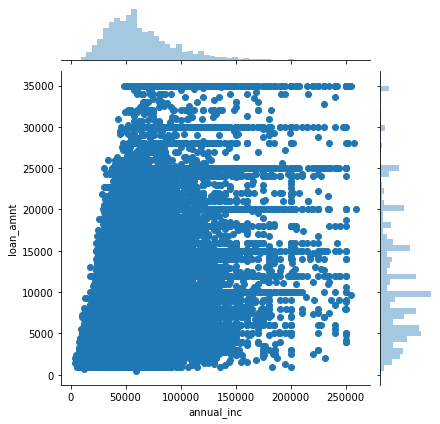

In [396]:
sns.jointplot('annual_inc', 'loan_amnt', master_loan.loc[master_loan['annual_inc']<260000])
plt.show()

### Observation :

People having annual income of less than 50000 are taking loans greater than 25000, which can be quite risky.

## loan_amnt vs grade

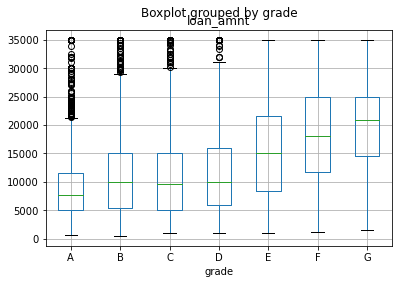

In [397]:
master_loan.boxplot(column='loan_amnt', by='grade')
plt.show()

### Observation : 

Larger amounts are generaly given lower grades. Medians of grades B, C and D are almost equal.

## annual_inc vs grade

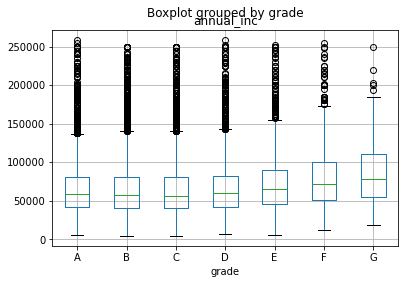

In [398]:
master_loan.loc[master_loan['annual_inc']<260000].boxplot(column='annual_inc', by='grade')
plt.show()

## Observation : 

Not much of a difference. 

### loan_amnt vs verification_status vs loan_status

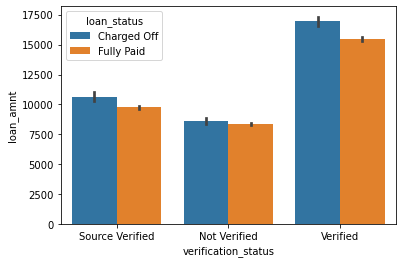

In [399]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=master_loan, estimator=np.mean)
plt.show()

### Observations :

1. Higher loan amounts are verified thoroughly.
2. This explains that the although higher amounts are mostly charged-off in percentage , probably because of less numbers, but they are more verified than the rest.

### loan_amnt vs grade vs term_in_months

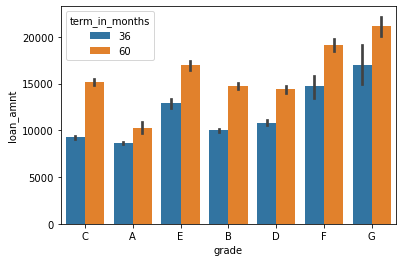

In [401]:
sns.barplot(x='grade', y='loan_amnt', hue="term_in_months", data=master_loan, estimator=np.mean)
plt.show()

### Observation :

The higher the loan amount, the more is the term in months associated with lower grades.
=> Loan Amount is directly proportional to term is inversely proportional to grades.

### loan_amnt vs term_in_months vs loan_status

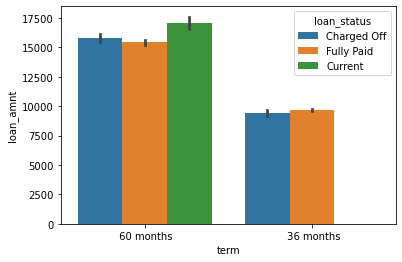

In [402]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=clean_loan, estimator=np.mean)
plt.show()

### Observation :

Higher loan amounts are having more terms and tend to be more charge-offs.

### grade vs loan_status vs revol_util

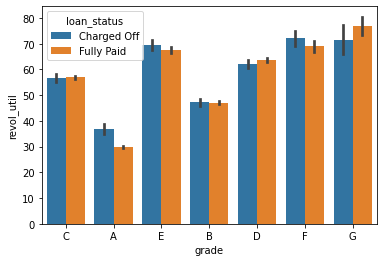

In [403]:
sns.barplot(x='grade', y='revol_util', hue="loan_status", data=master_loan, estimator=np.mean)
plt.show()

### Observation :

This shows that revol_util is positively correlated with grades.

In [ ]:
# Lets move to correlations and observe.

In [404]:
corr=master_loan.corr()
corr['loan_amnt']

loan_amnt                 1.000000
term_in_months            0.350011
installment               0.930743
emp_length                0.144922
annual_inc                0.258984
dti                       0.063093
delinq_2yrs              -0.035290
inq_last_6mths            0.010000
open_acc                  0.174265
pub_rec                  -0.046942
revol_bal                 0.319781
revol_util                0.067081
total_acc                 0.255773
pub_rec_bankruptcies     -0.030431
earliest_cr_line_month   -0.016516
earliest_cr_line_year    -0.195540
annual_inc_bin            0.260190
Name: loan_amnt, dtype: float64

<AxesSubplot:>

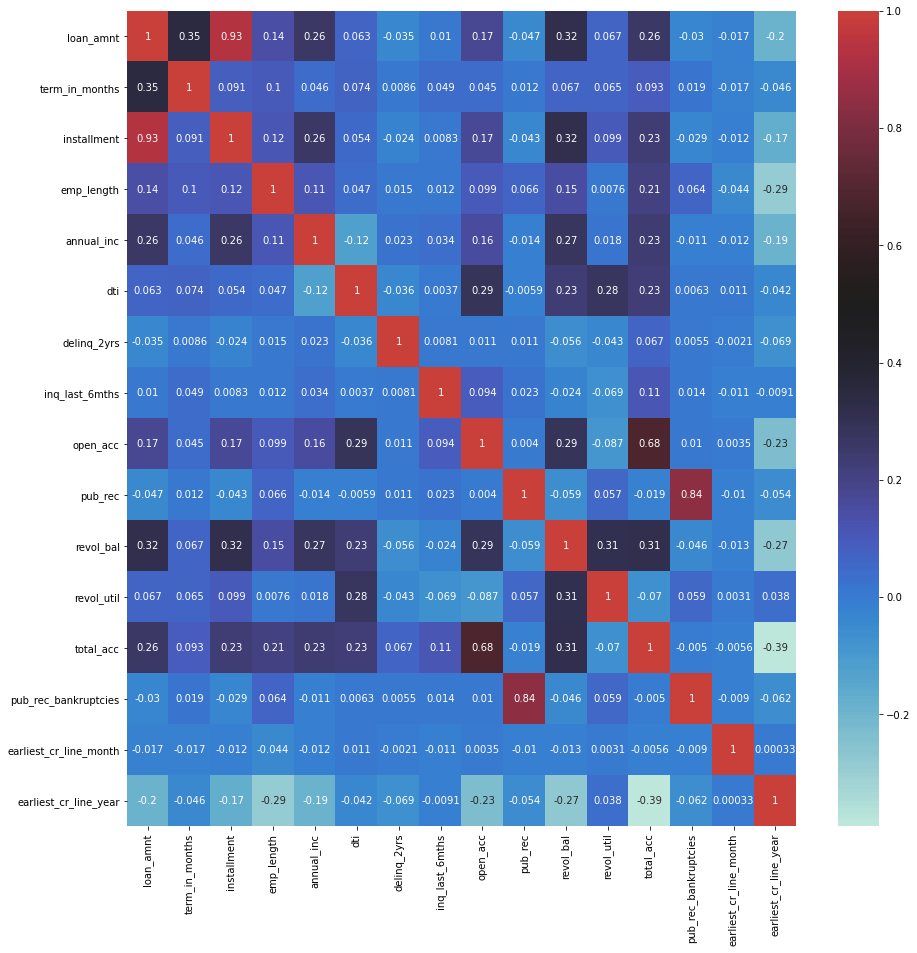

In [405]:
plt.figure(figsize=(15,15))
tot_var= ['loan_amnt', 'term_in_months', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 
       'pub_rec_bankruptcies','earliest_cr_line_month','earliest_cr_line_year']
corr = master_loan[tot_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

### Observations :

1. Loan amount is positively correlated to Installments. Higher the loan amount higher the installments.
2. Loan amount is negatively correlated with delinq_2yrs with the r factor of -0.035290 indicating more the loan amount larger the delinquency.
3. delinq_2yrs is not correlated to pub_rec_bankrupcies. There can be different reasons for each.

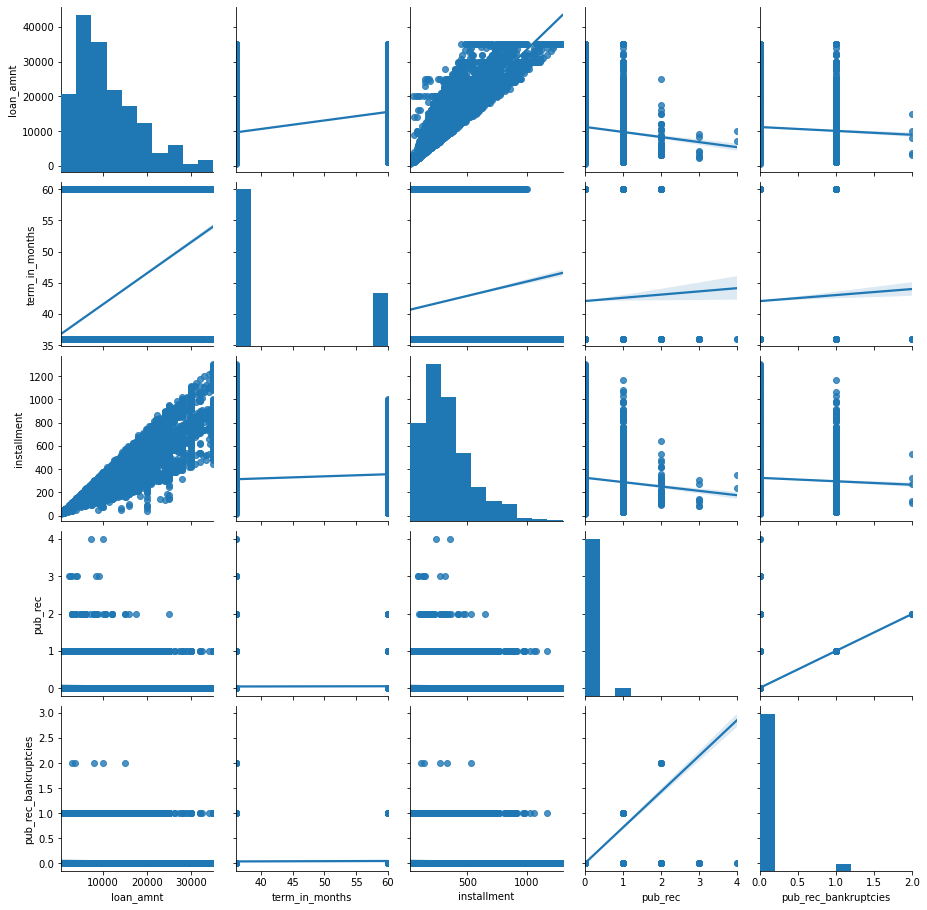

In [406]:
sns.pairplot(master_loan[["loan_amnt","term_in_months","installment","pub_rec","pub_rec_bankruptcies"]],kind='reg')
plt.show()

### Observations :

1. term_in_months are positively correlated to the loan amount, installment,pub_rec and pub_rec bankrupcies.
2. installment follow negative correlation with pub_rec.
3. loan amount follows negative correlation with pub_rec but the reverse is not true.